# Eigenvalue Spectrum

We endeavor to understand better the eigenvalue spectrum of KS Kahler metrics, so that we might be able to learn a random matrix approximation of them that scales well with h11.

## Data import

We check to make sure that the number of eigenvalues is h11, a non-trivial bug check

In [1]:
import os
import cPickle as pickle
import numpy as np

files = [d for d in os.listdir('data') if d[0] == 'h' and 'evals' in d]
print('num files', len(files))
assert_mismatch = []
def info_from_file(file):
    h11 = int(file.split("_")[1])
    s = file.split("_")[2]
    poly = int(
    s[s.index('y')+1:])
    f = open("data/"+file,'rb')
    evals = pickle.load(f)
    f.close()
    to_ret = [(h11,poly),evals]
    try:
        assert len(evals) == h11
    except AssertionError:
        assert_mismatch.append(to_ret[0])
    return to_ret

raw_data = [info_from_file(file) for file in files]
print(set([len(r[1]) - r[0][0] for r in raw_data]))
raw_data = [r for r in raw_data if len(r[1]) - r[0][0] == 0]
print("num files after eval mismatch subtraction", len(raw_data))
print(assert_mismatch)

('num files', 30719)
set([0])
('num files after eval mismatch subtraction', 30719)
[]


In [2]:
print raw_data[0][0]
print raw_data[0][1]

(10, 7339)
[27.15347122 20.69570997  0.44188155  1.07146702 17.76017629 15.46934428
 12.89878366  5.04161884  7.04767809  8.27605406]


## Dump evals to file

In [3]:
def dump_evals(h11):
    evs = []
    for r in raw_data:
        if r[0][0] == h11:
            evs = evs + list(r[1])
    np.savetxt("h11_"+str(h11)+"_eigs.txt",evs)

dump_evals(10)
dump_evals(20)
dump_evals(30)
dump_evals(40)
dump_evals(50)

## Aggregated Eigenvalue Spectra

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27

h11s, polys, evals = [], [], []
for data in raw_data:
    for i in range(len(data[1])):
        h11s.append(data[0][0])
        polys.append(data[0][1])
        evals.append(data[1][i])
        

data = pd.DataFrame({'h11': h11s, 'evals': evals, 'log10evals': [np.log10(k) for k in evals]})

print [(h11s[j], polys[j]) for j in [evals.index(k) for k in evals if k < 0]]

print [k for k in evals if k < 0]

[]
[]


## Check For Localization of Eigenvalues

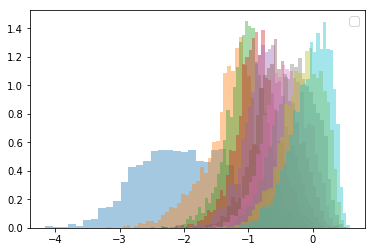

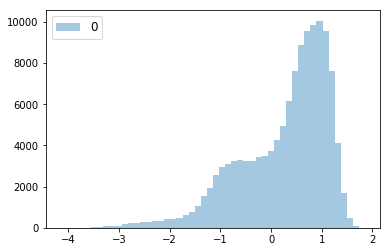

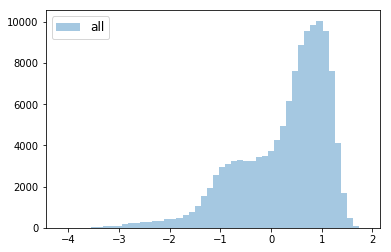

In [4]:
sortyspre = []
for datado in raw_data:
    if datado[0][0] == 30:
        notlog = list(sorted(set(datado[1])))
        sortyspre.append([np.log10(this) for this in notlog])
sortys = np.array(sortyspre).T.tolist()
    #for i in range(len(data[1])):
    #    h11s.append(data[0][0])
    #    polys.append(data[0][1])
    #    s = set(data[1]) 
    #    mins.append(sorted(s)[pos])

#datamin = pd.DataFrame({'h11': h11s, 'mins': mins, 'log10mins': [np.log10(k) for k in mins]})
#dfmin50= datamin[datamin.h11 == 50]
#for ii in range(len(sortys)):
for ii in range(10):
    #sns.distplot(sortys[ii], kde=False, label=str(ii), norm_hist = True)
    sns.distplot(sortys[ii], kde=False, norm_hist = True)
#sns.distplot(sortys[1], kde=False, label='1', norm_hist = True)
#sns.distplot(sortys[2], kde=False, label='2', norm_hist = True)
#sns.distplot(sortys[3], kde=False, label='3', norm_hist = True)
#sns.distplot(sortys[4], kde=False, label='4', norm_hist = True)
#sns.distplot(sortys[5], kde=False, label='5', norm_hist = True)
#sns.distplot(sortys[6], kde=False, label='6', norm_hist = True)
#sns.distplot(sortys[7], kde=False, label='7', norm_hist = True)
#sns.distplot(sortys[len(sortys)-1], kde=False, label='max', norm_hist = True)

plt.legend(prop={'size':12})
plt.show()

sns.distplot([item for sublist in [sortys[pp] for pp in range(len(sortys))] for item in sublist],
             kde=False, label='0', norm_hist = False)
plt.legend(prop={'size':12})
plt.show()

sns.distplot([item for sublist in sortys for item in sublist], kde=False, label='all', norm_hist = False)
plt.legend(prop={'size':12})
plt.show()

In [6]:
#We should also random sample


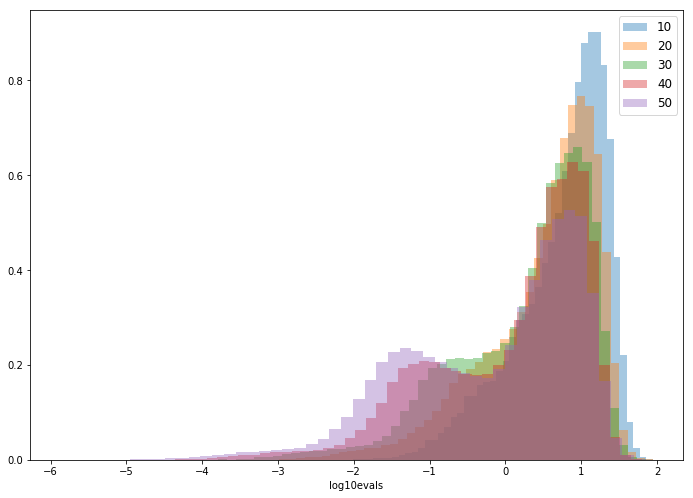

In [5]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27

df10= data[data.h11 == 10]
df20= data[data.h11 == 20]
df30= data[data.h11 == 30]
df40= data[data.h11 == 40]
df50= data[data.h11 == 50]

sns.distplot(df10['log10evals'], kde=False, label='10', norm_hist = True)
sns.distplot(df20['log10evals'], kde=False, label='20', norm_hist = True)
sns.distplot(df30['log10evals'], kde=False, label='30', norm_hist = True)
sns.distplot(df40['log10evals'], kde=False, label='40', norm_hist = True)
sns.distplot(df50['log10evals'], kde=False, label='50', norm_hist = True)

plt.legend(prop={'size':12})
plt.show()

In the above plot you can clearly see a bimodal distribution developing for larger h11. To see this more, let's split out the histograms, one for each h11.

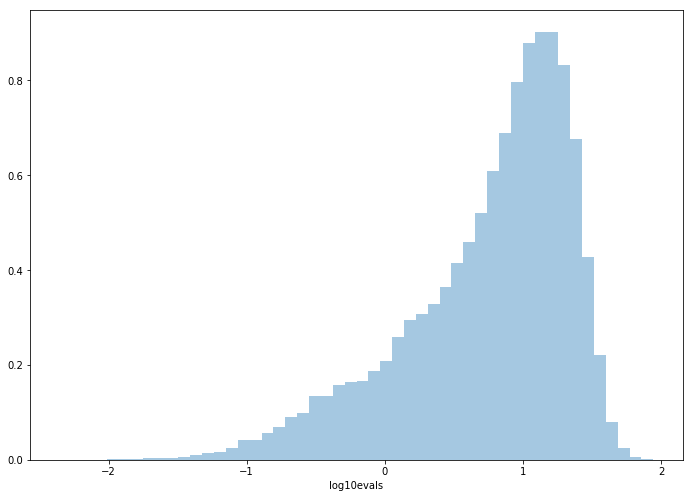

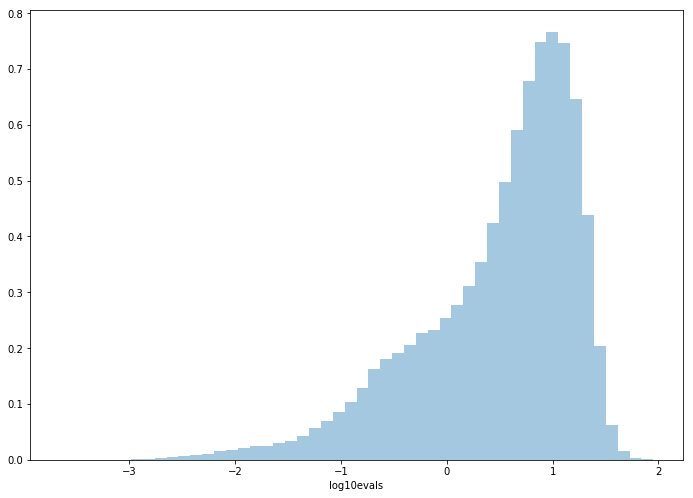

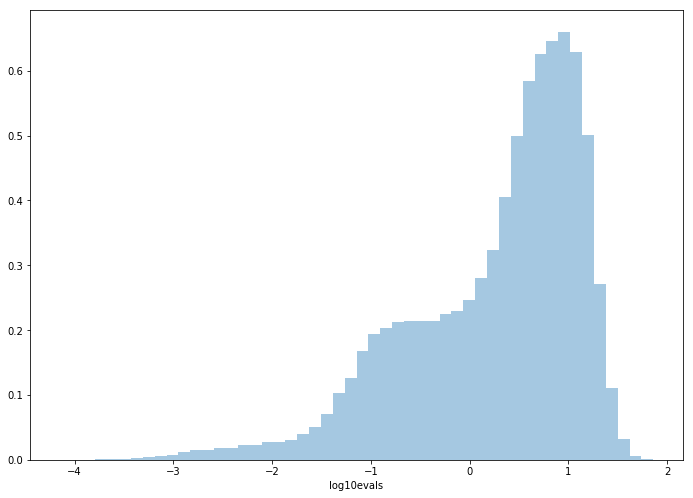

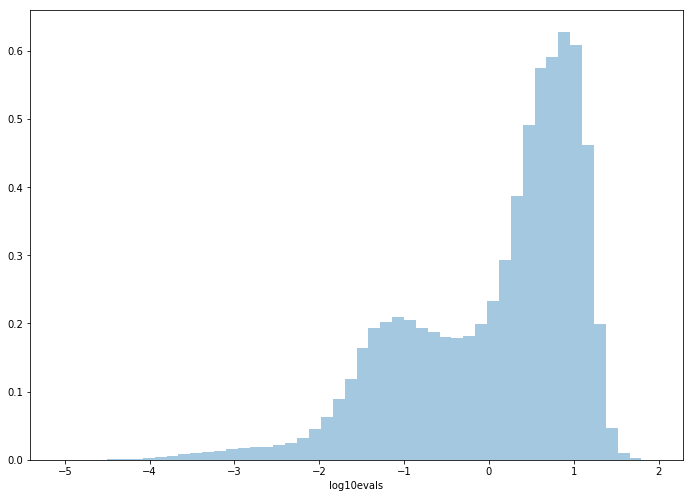

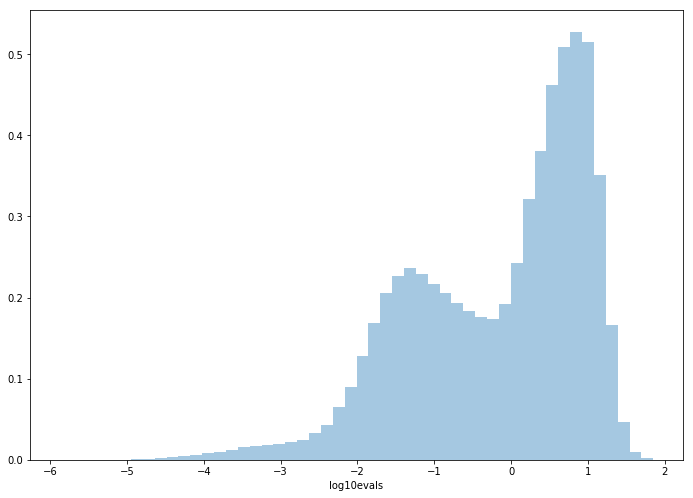

In [20]:
sns.distplot(df10['log10evals'], kde=False, label='10', norm_hist = True)
plt.show()
sns.distplot(df20['log10evals'], kde=False, label='20', norm_hist = True)
plt.show()
sns.distplot(df30['log10evals'], kde=False, label='30', norm_hist = True)
plt.show()
sns.distplot(df40['log10evals'], kde=False, label='40', norm_hist = True)
plt.show()
sns.distplot(df50['log10evals'], kde=False, label='50', norm_hist = True)
plt.show()

## Random Sampling

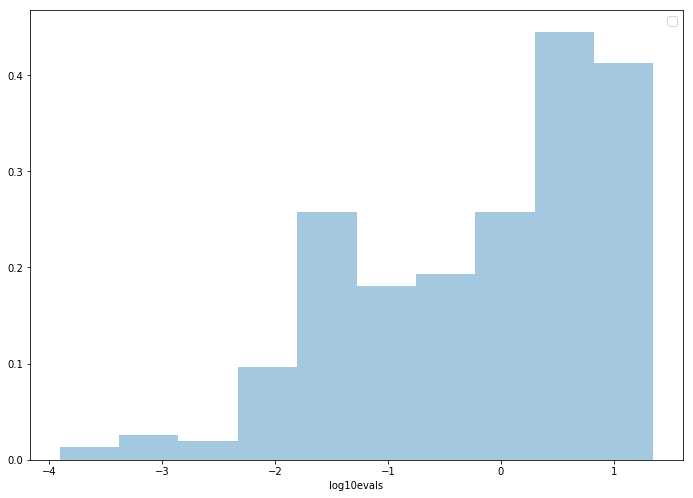

In [9]:
numsamps = 1
for ii in range(numsamps):
    dfhalf = df50.sample(frac=.001)
    sns.distplot(dfhalf['log10evals'], kde=False, #label=str(ii), 
                 norm_hist = True)

plt.legend(prop={'size':12})
plt.show()

In [10]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27

h11s, polys, evals = [], [], []
for data in raw_data:
    for i in range(len(data[1])):
        h11s.append(data[0][0])
        polys.append(data[0][1])
        evals.append(data[1][i])
        

data = pd.DataFrame({'h11': h11s, 'evals': evals, 'log10evals': [np.log10(k) for k in evals]})

#print [(h11s[j], polys[j]) for j in [evals.index(k) for k in evals if k < 0]]

#print [k for k in evals if k < 0]

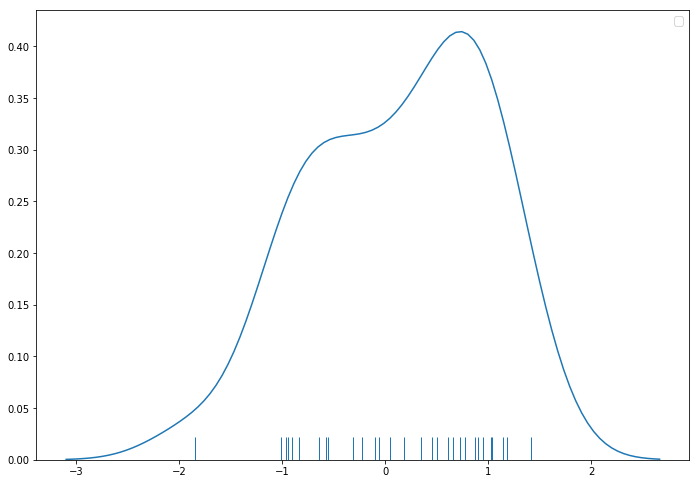

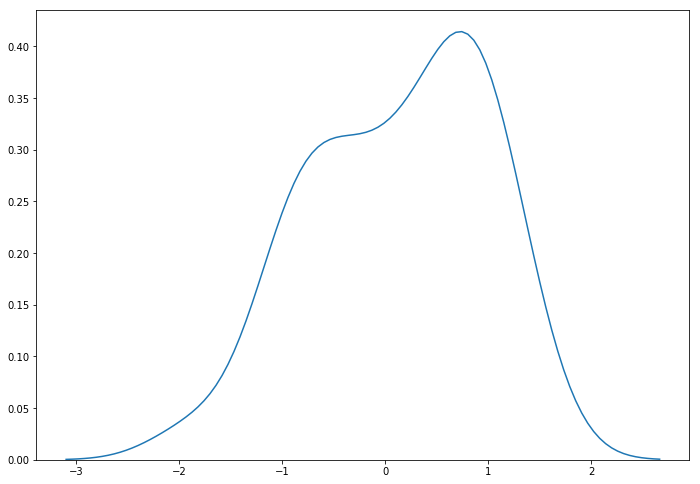

In [11]:
rand_samp = []

bins5 = np.arange(-3,2,.5)
bins25 = np.arange(-3,2,.25)
bins125 = np.arange(-3,2,.125)

rand_samp = []
for ii in range(1):
    f = np.random.randint(0,len(sortyspre))
    rand_samp = rand_samp + sortyspre[f]

sns.distplot(rand_samp, kde=True, rug=True, hist=False)
plt.legend(prop={'size':12})
plt.show()

# sns.distplot(rand_samp, kde=True, #label=str(ii), 
#                  norm_hist = True, bins = bins25)
# plt.legend(prop={'size':12})
# plt.show()

# sns.distplot(rand_samp, kde=True, #label=str(ii), 
#                  norm_hist = True, bins = bins125)
# plt.legend(prop={'size':12})
# plt.show()

f = sns.kdeplot(rand_samp)

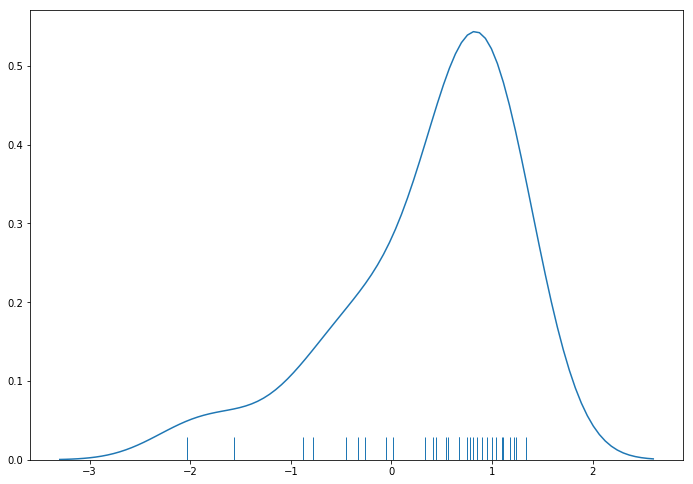

NameError: name 'y' is not defined

In [12]:
for data in sortyspre:
    f = sns.distplot(data, kde=True, rug=True, hist=False)
    #x, y = f.get_lines()[0].get_data()
    plt.show()
    print y

# f = sns.kdeplot(sortyspre[2])
# x, y = f.get_lines()[0].get_data()
# print y

# Now we will try to get some separation

We want to determine what causes the data to have that peak around -1.5, and what doesn't.

The first 'has_peak_near' method was trying to make sure that there are actually sufficiently sharp peaks in the KDE near where we expect it to be. There is a threshold for the height of the next trough over the height of the peak. Overall, this worked fine, but not as well as the following.

The second 'has_peak_near' method just tries to throw out the KDE story altogether, and just checked whether there are sufficiently many eigenvalues in val +- thresh. This seems to work betterm see output below.

In [6]:
from scipy.signal import find_peaks
print len(sortyspre)

def has_peak_near(data,x,y,peak_idxs,trough_idxs, val, thresh):
    #print peak_idxs, trough_idxs, val, thresh
    idxs = list(peak_idxs) + list(trough_idxs)
    idxs.sort()
    for idx in idxs:
        if idx in peak_idxs:
            peak_idx, peak_x, peak_y = list(peak_idxs).index(idx), x[idx], y[idx]
            #print 'peak_x', peak_x
            if peak_x >= val - thresh and peak_x <= val + thresh:
                if len(trough_idxs) > 0 and peak_idx < len(trough_idxs):
                    #print peak_x, peak_idx, trough_idxs
                    trough_y = y[trough_idxs[peak_idx]] # next trough at same idx
                    #print peak_y, trough_y,  abs(trough_y/peak_y)
                    assert peak_y > trough_y
                    if abs(trough_y/peak_y) < .5:
                        #print 'RETURNING TRUE'
                        return True
                else: return True

    return False

def has_peak_near(data,x,y,peak_idxs,trough_idxs, val, thresh):
    data_list = list(data)
    return sum([1 if (e <= val + thresh and e >= val - thresh) else 0 for e in data_list]) > 6

threshs = [k/10.0 for k in range(21)]
has_onep3_peak, no_onep3_peak = {}, {}
for thresh in threshs:
    has_onep3_peak[thresh] = []
    no_onep3_peak[thresh] = []
    
for idx,data in enumerate(sortyspre):
    if idx % 500 == 0: print idx
    f = sns.kdeplot(data)
    x,y = f.get_lines()[0].get_data()
    plt.clf()
    #print y
    ny=[-k for k in y]
    peak_idxs, trough_idxs = find_peaks(y)[0], find_peaks(ny)[0]
    peak_locs, trough_locs = [x[k] for k in peak_idxs], [x[k] for k in trough_idxs]
    for thresh in has_onep3_peak:
        if has_peak_near(data,x,y,peak_idxs,trough_idxs,-1.5,thresh):
            has_onep3_peak[thresh].append(idx)
        else:
            no_onep3_peak[thresh].append(idx)
    #print 'peaks:', peak_locs
    #print 'troughs:', trough_locs


4222
0
500
1000
1500
2000
2500
3000
3500
4000


<Figure size 842.4x595.44 with 0 Axes>

In [ ]:
has_eigs, doesnt_eigs = {}, {}
for thresh in threshs:
    has_eigs[thresh] = []
    doesnt_eigs[thresh] = []
    for idx in has_onep3_peak[thresh]:
        has_eigs[thresh].extend(sortyspre[idx])
    for idx in no_onep3_peak[thresh]:
        doesnt_eigs[thresh].extend(sortyspre[idx])

for thresh in threshs:
    print len(has_onep3_peak[thresh]), len(no_onep3_peak[thresh]), len(has_onep3_peak[thresh])+len(no_onep3_peak[thresh])

THRESH: 0.0
0 4222 4222


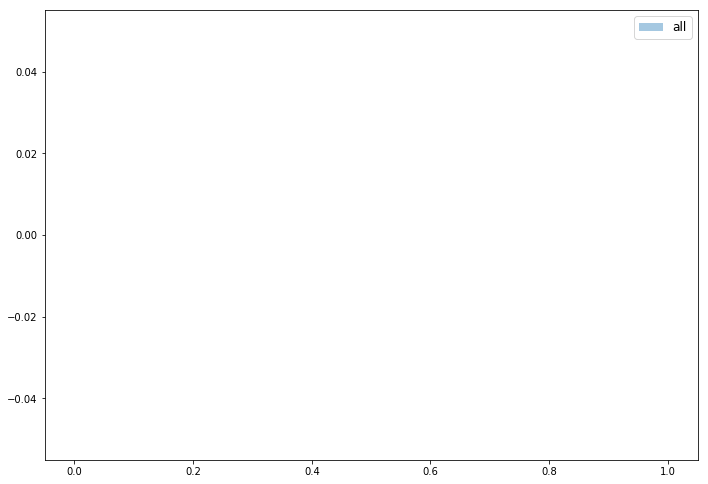

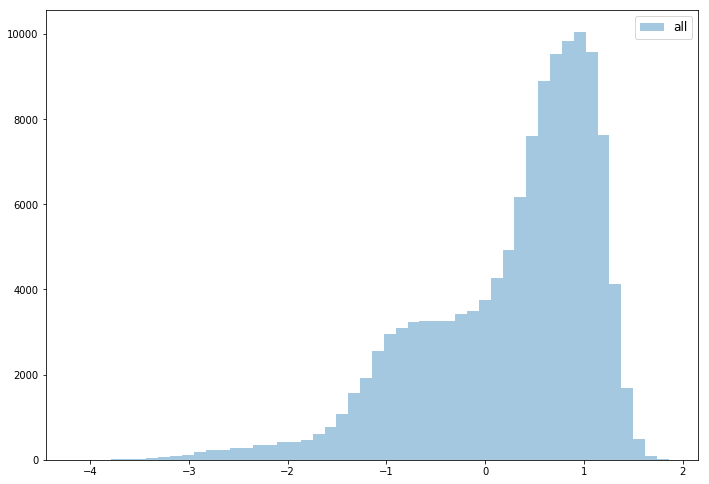

THRESH: 0.1
0 4222 4222


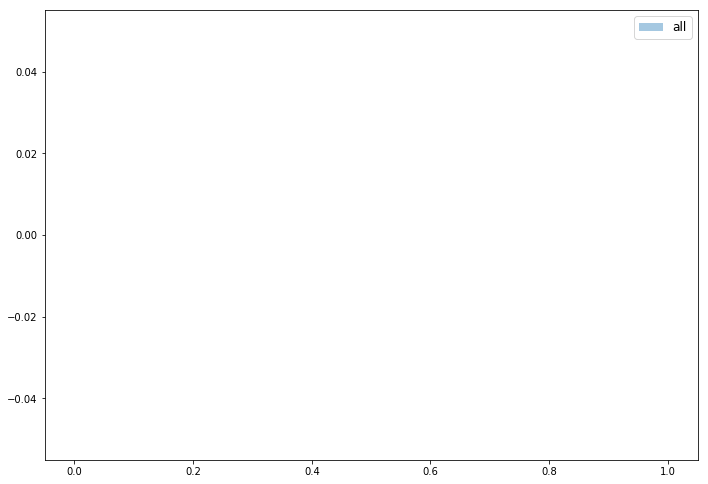

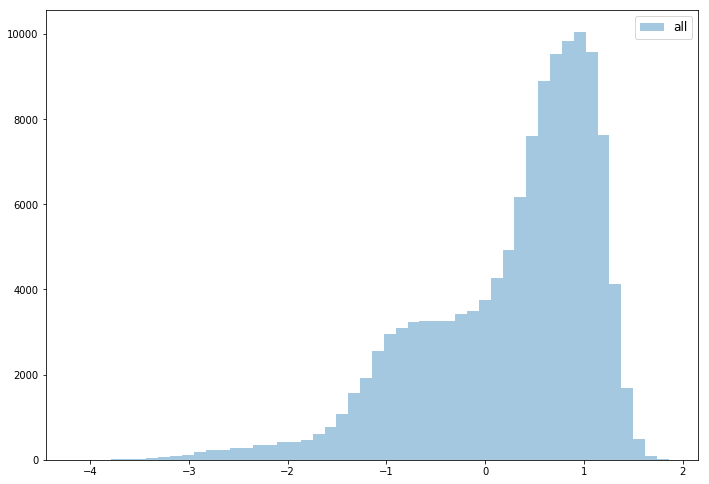

THRESH: 0.2
1 4221 4222


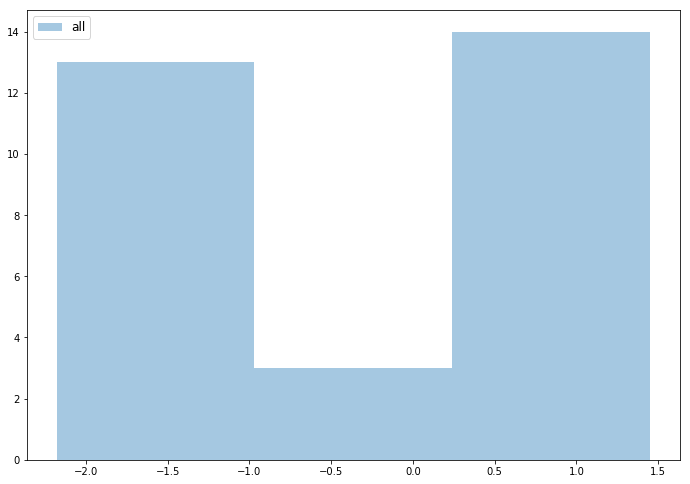

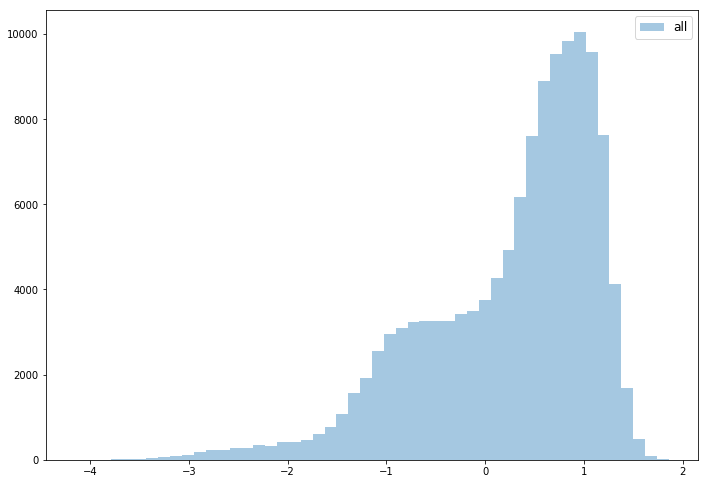

THRESH: 0.3
7 4215 4222


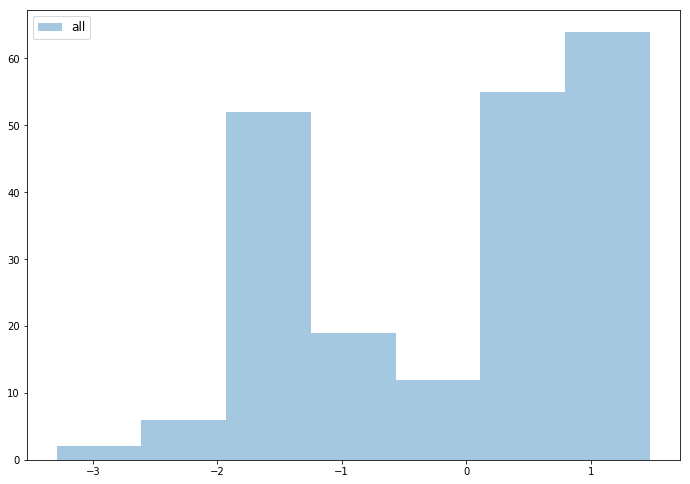

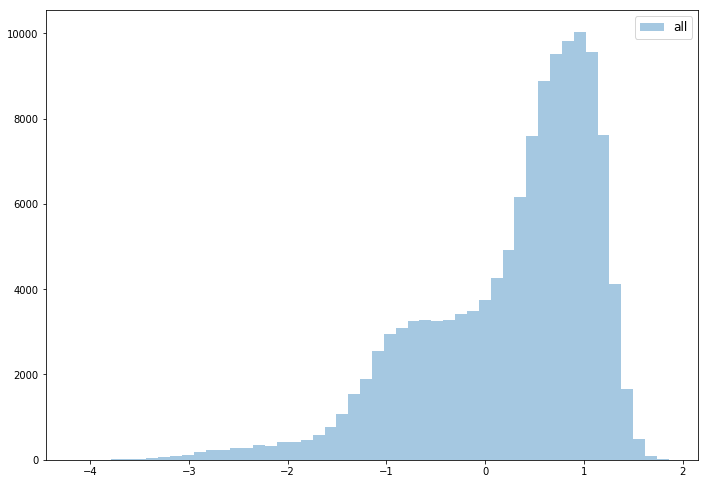

THRESH: 0.4
33 4189 4222


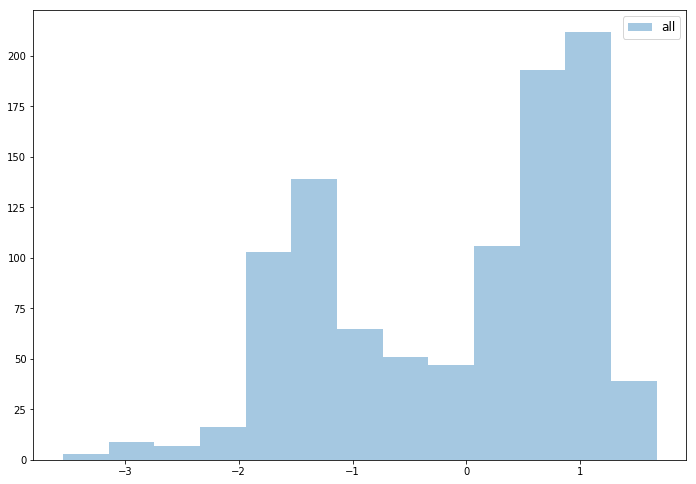

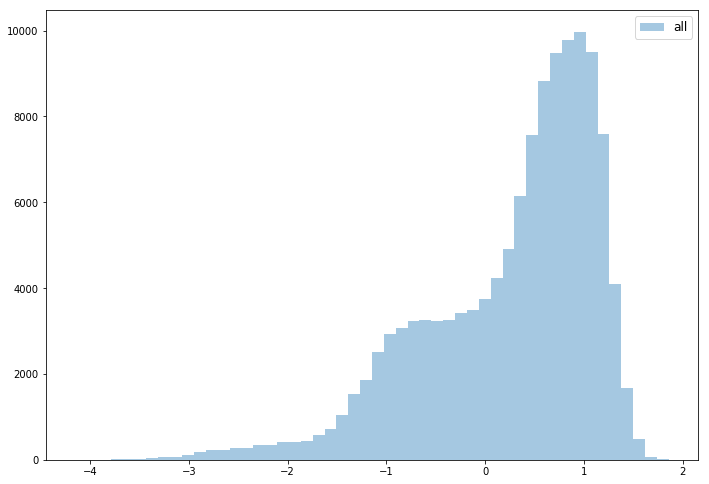

THRESH: 0.5
102 4120 4222


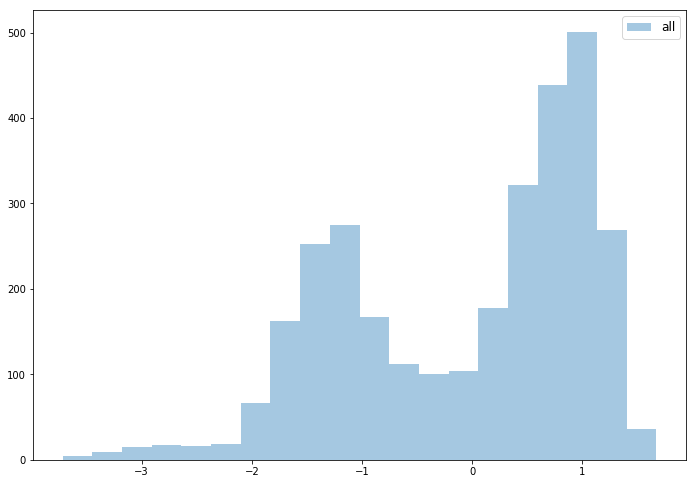

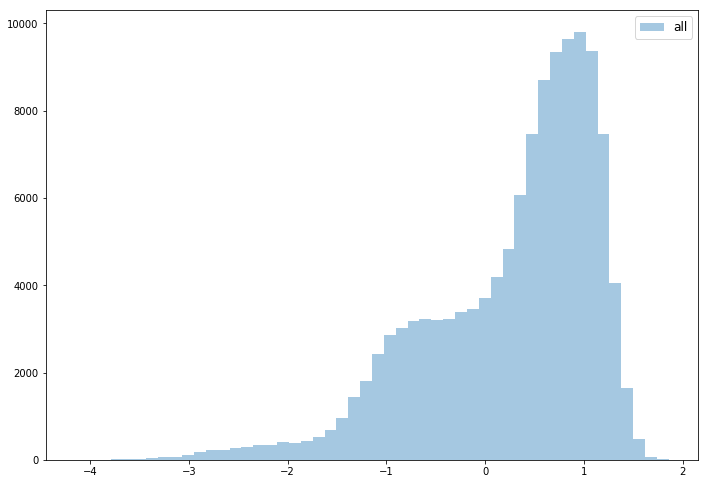

THRESH: 0.6
205 4017 4222


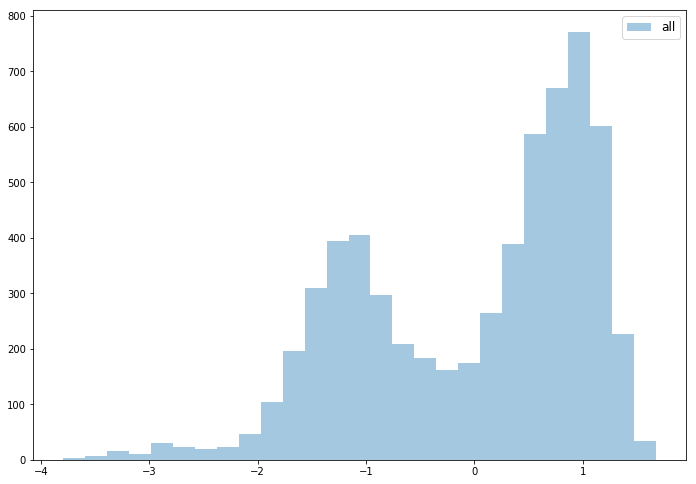

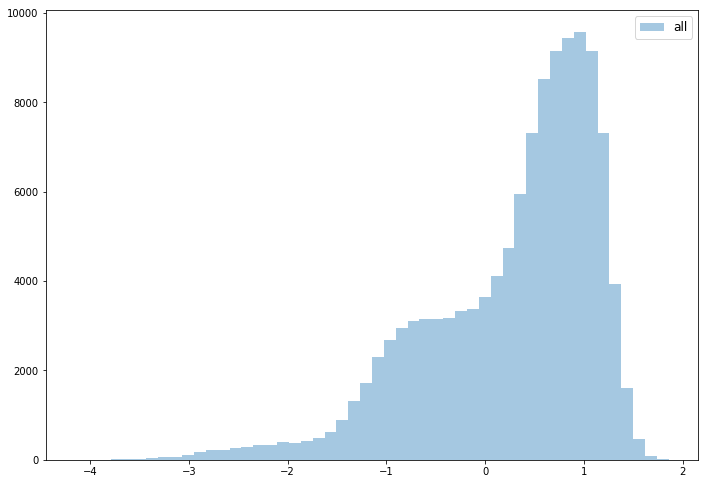

THRESH: 0.7
379 3843 4222


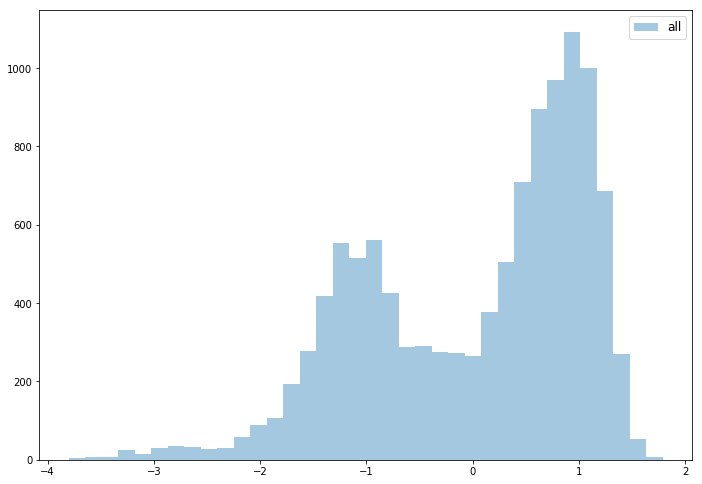

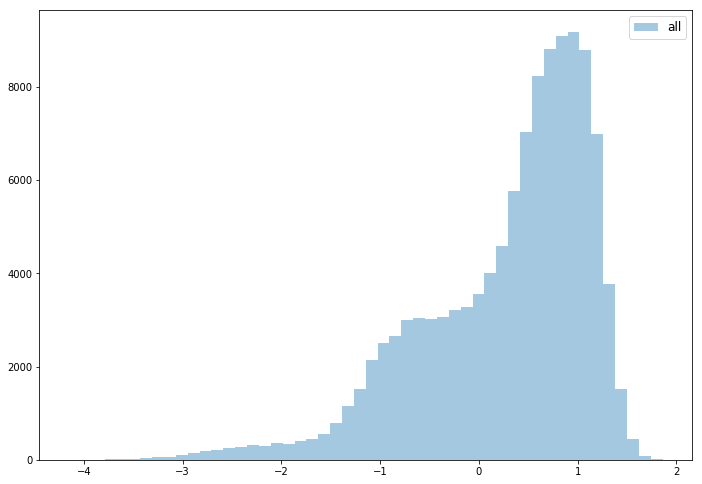

THRESH: 0.8
644 3578 4222


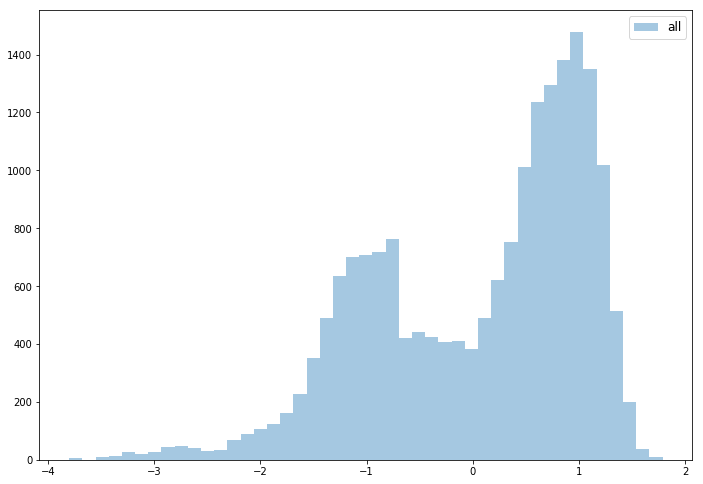

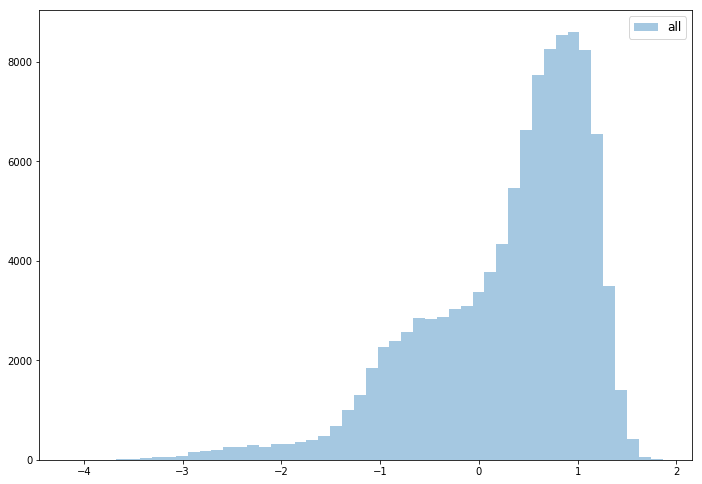

THRESH: 0.9
1032 3190 4222


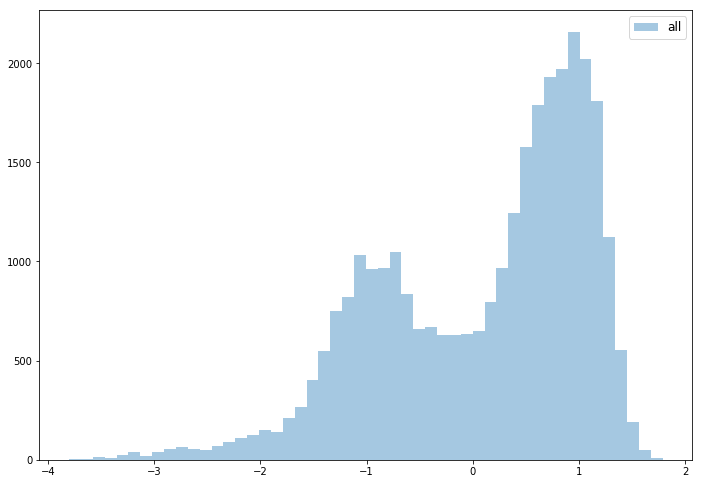

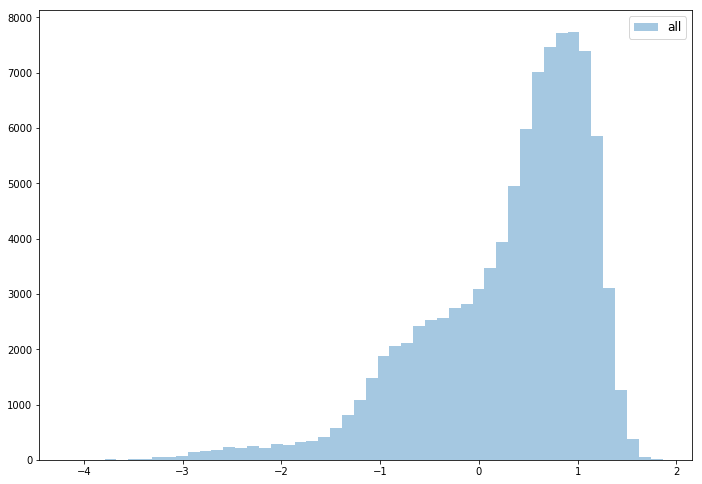

THRESH: 1.0
1498 2724 4222


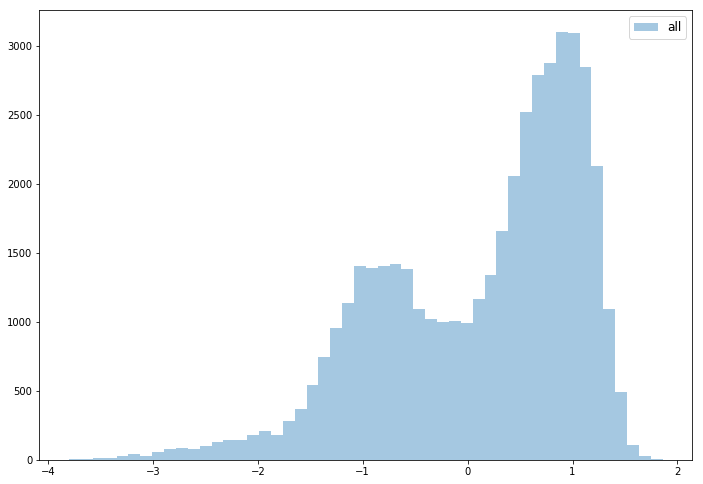

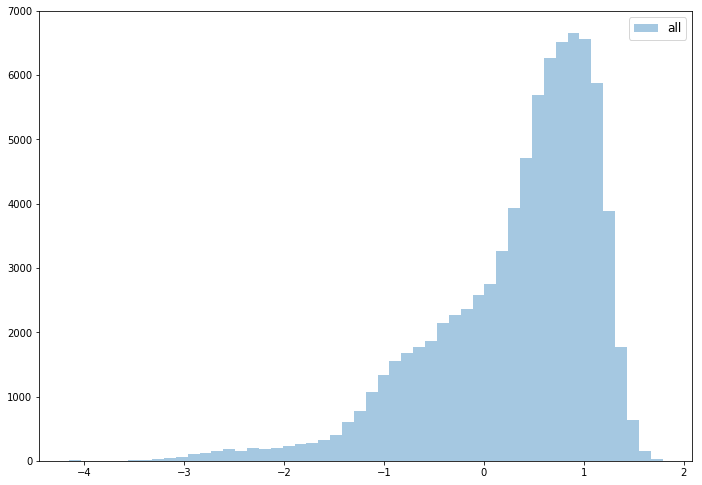

THRESH: 1.1
2023 2199 4222


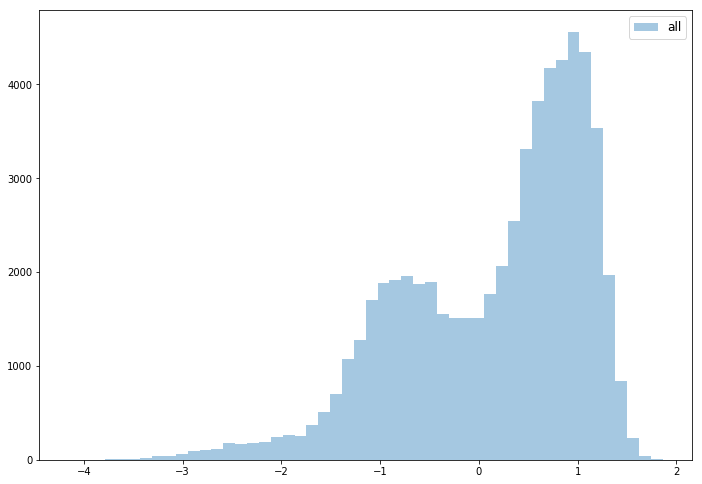

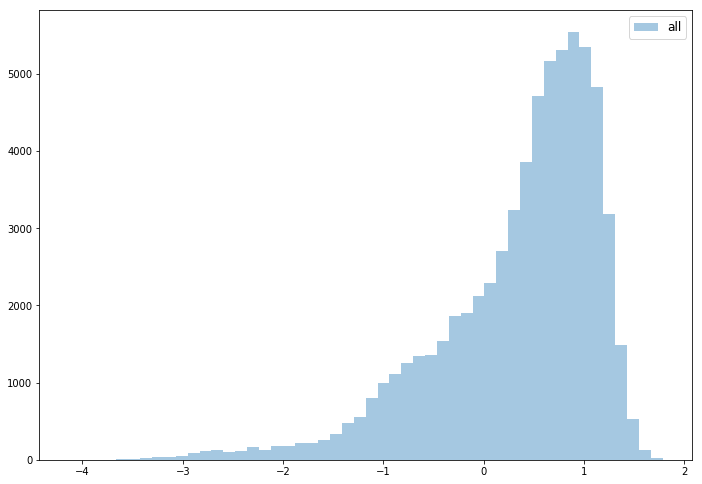

THRESH: 1.2
2553 1669 4222


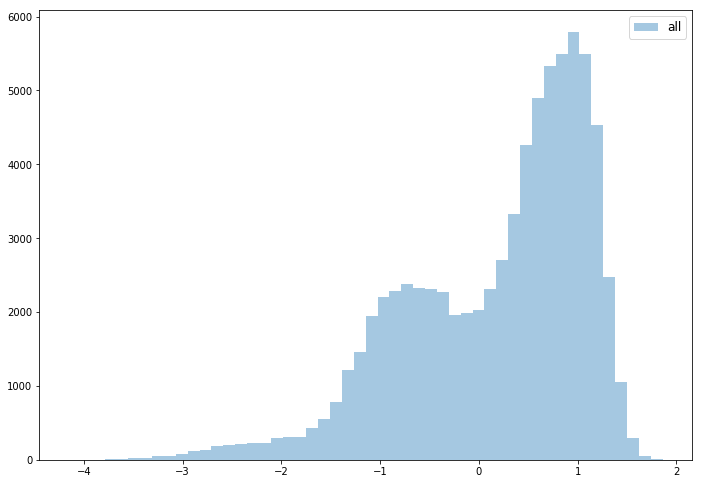

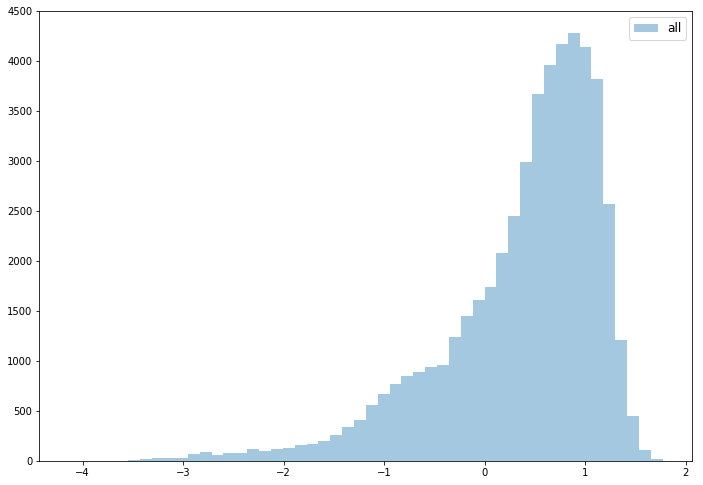

THRESH: 1.3
3037 1185 4222


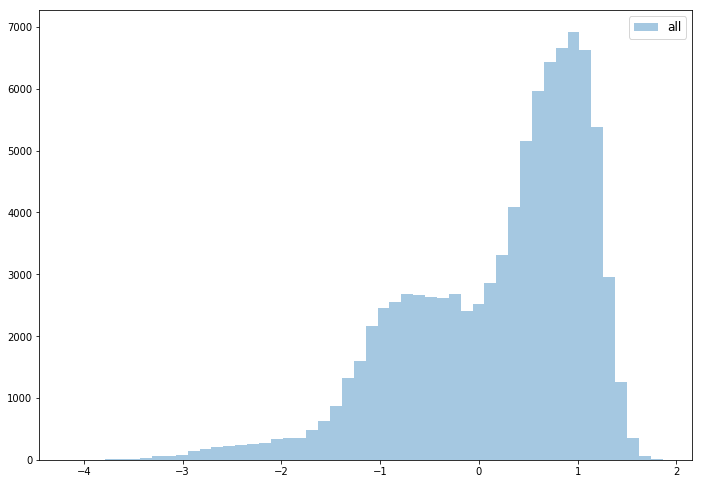

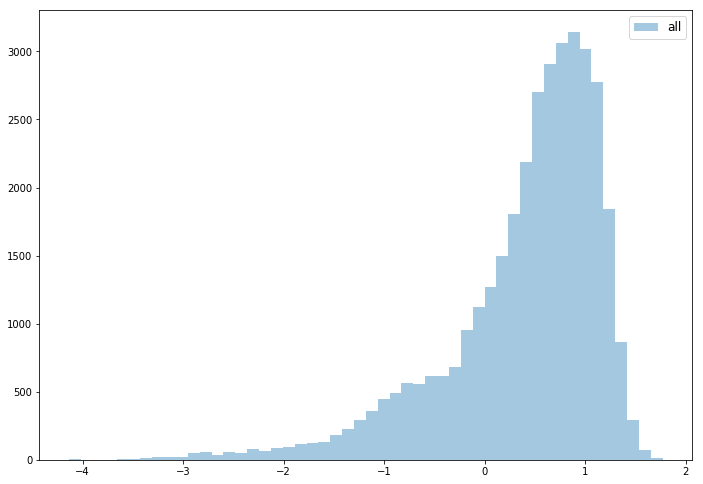

THRESH: 1.4
3437 785 4222


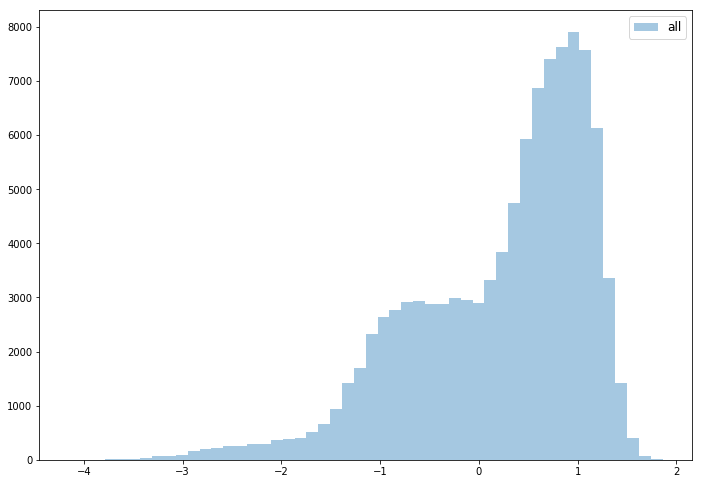

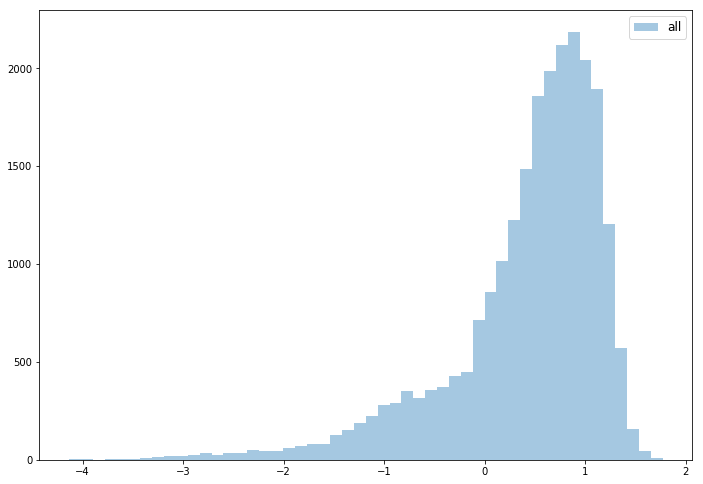

THRESH: 1.5
3742 480 4222


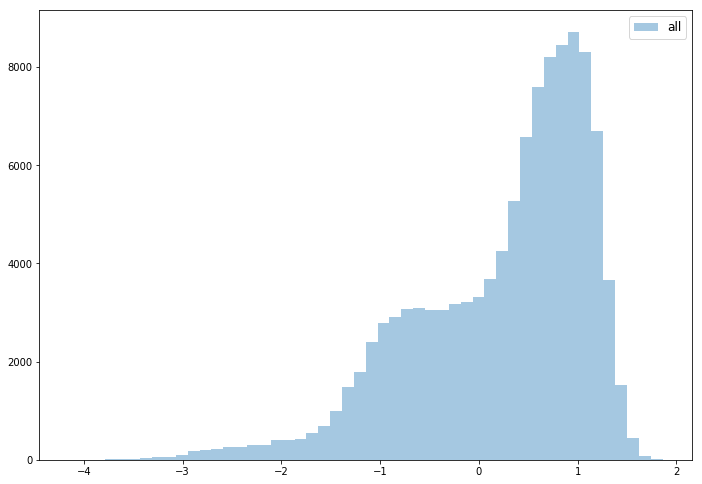

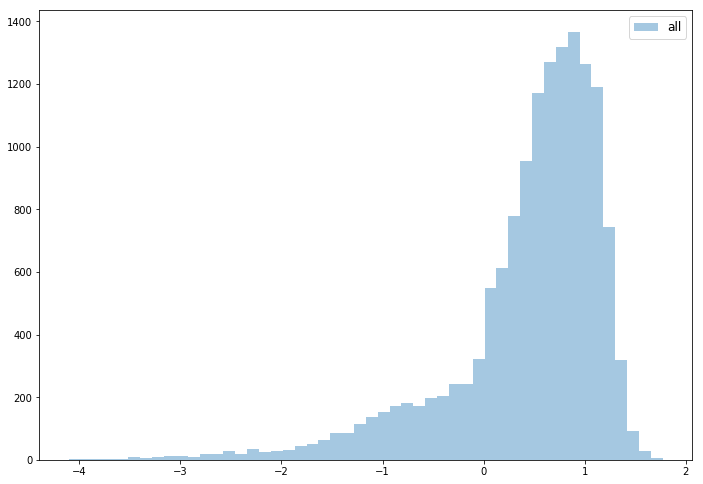

THRESH: 1.6
4006 216 4222


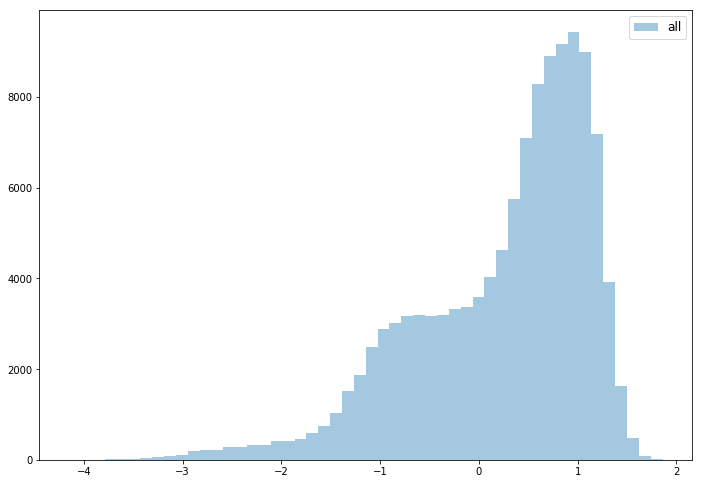

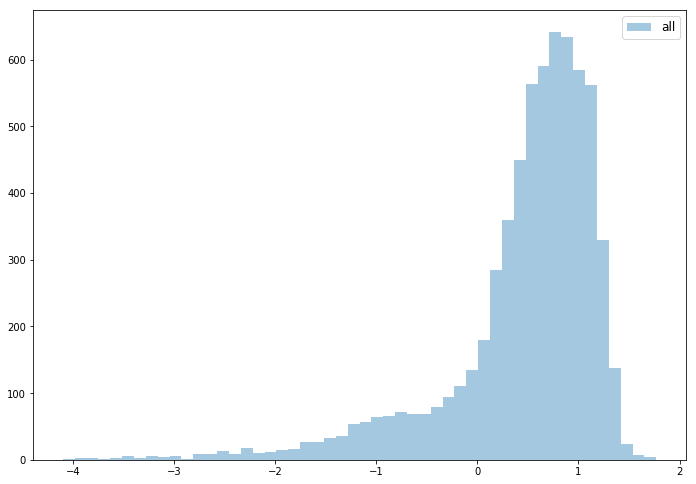

THRESH: 1.7
4153 69 4222


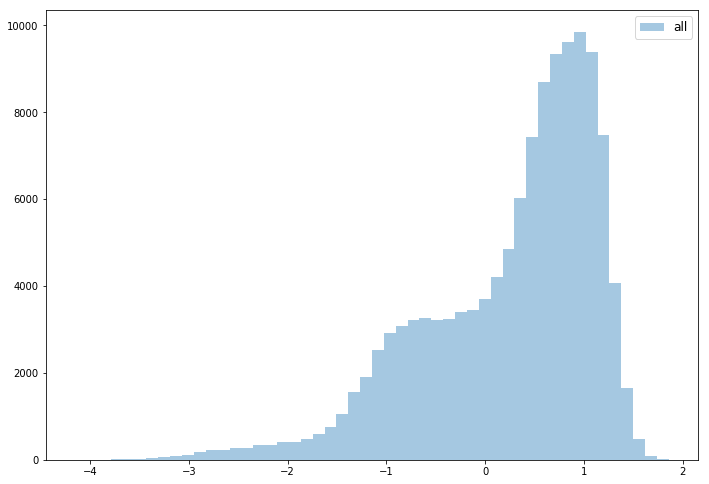

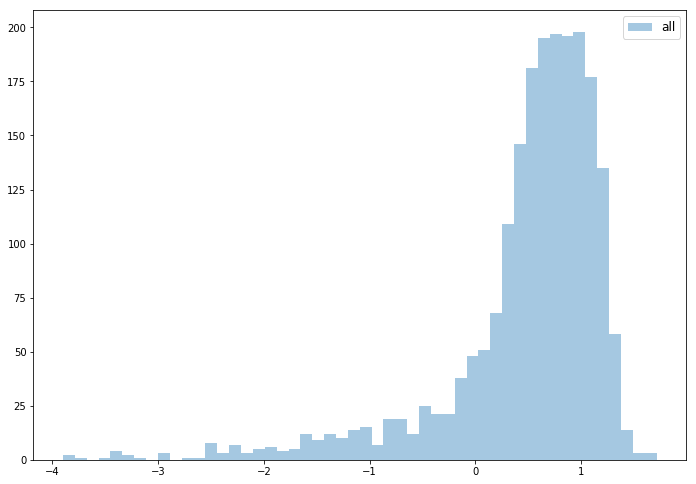

THRESH: 1.8
4207 15 4222


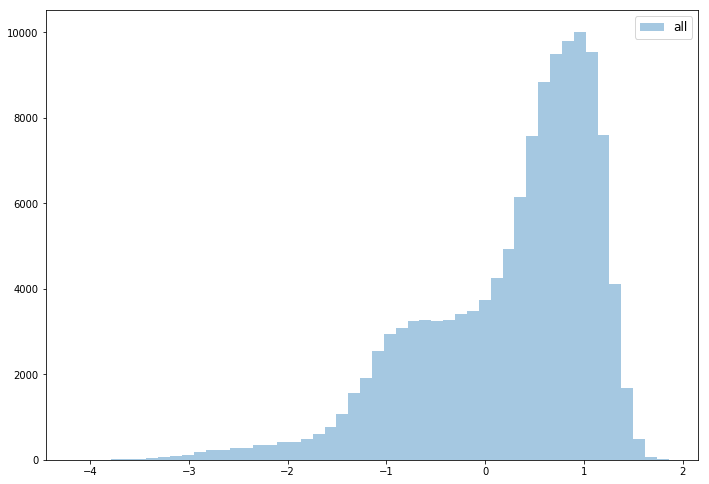

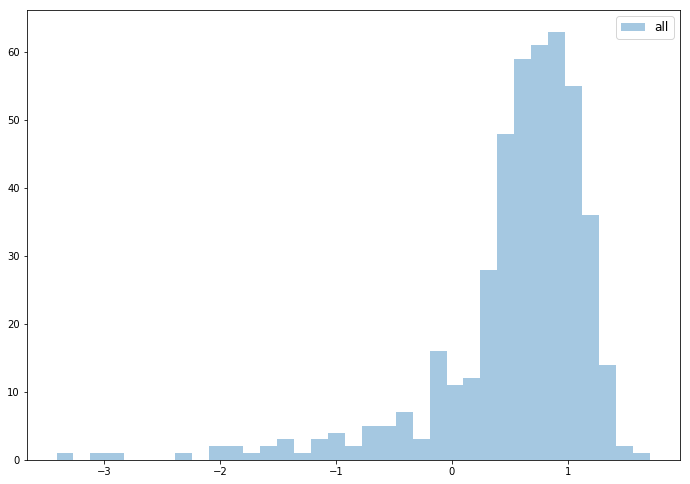

THRESH: 1.9
4220 2 4222


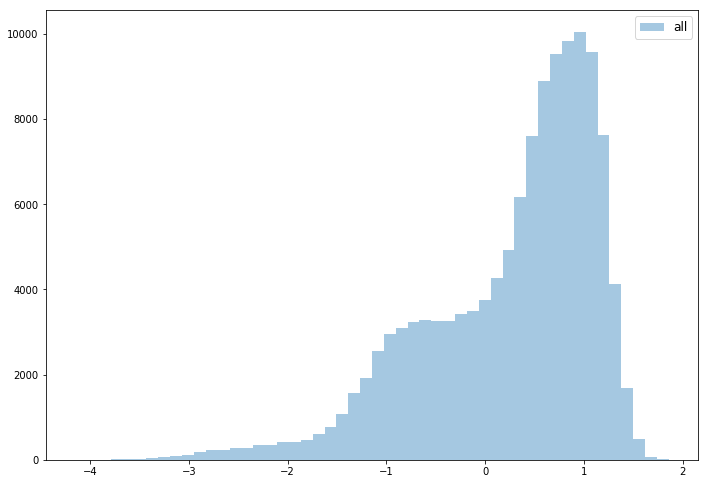

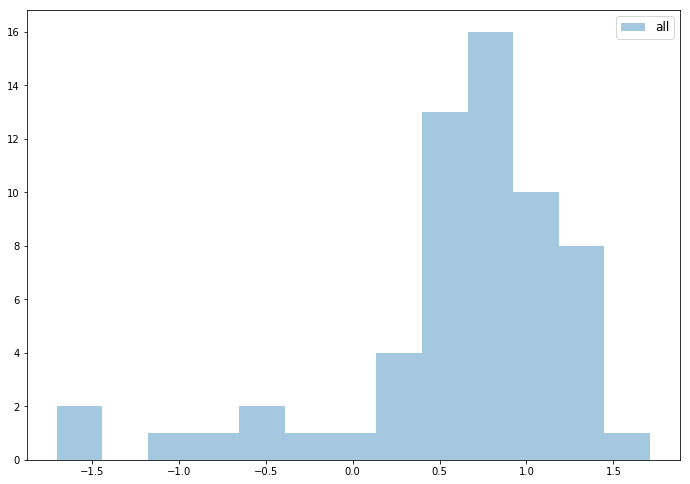

THRESH: 2.0
4222 0 4222


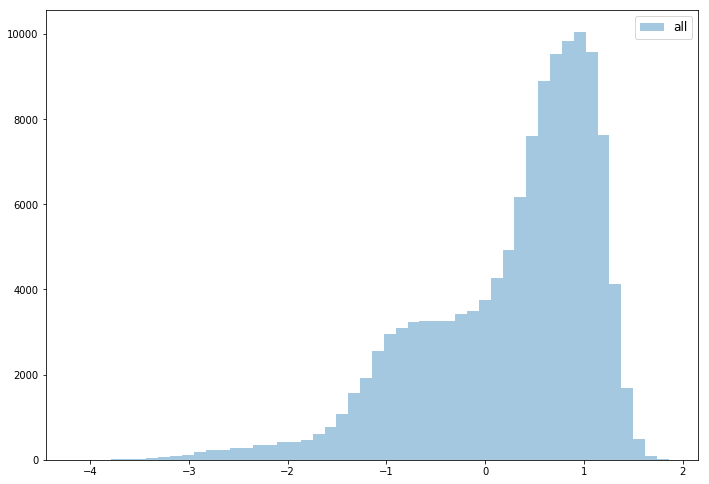

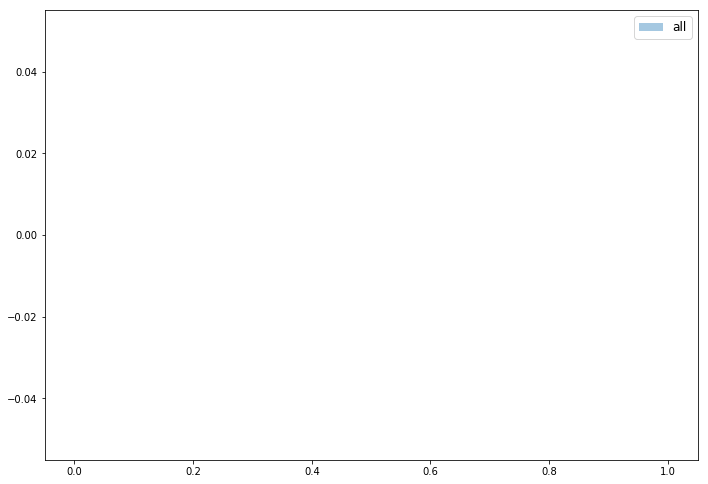

In [33]:
for thresh in threshs:
    print "THRESH:", thresh
    print len(has_onep3_peak[thresh]), len(no_onep3_peak[thresh]), len(has_onep3_peak[thresh])+len(no_onep3_peak[thresh])
    sns.distplot(has_eigs[thresh], kde=False, label='all', norm_hist = False)
    plt.legend(prop={'size':12})
    plt.show()
    sns.distplot(doesnt_eigs[thresh], kde=False, label='all', norm_hist = False)
    plt.legend(prop={'size':12})
    plt.show()

# Same as above, but > 9, and then 3

0
500
1000
1500
2000
2500
3000
3500
4000
0 4222 4222
0 4222 4222
0 4222 4222
0 4222 4222
1 4221 4222
4 4218 4222
15 4207 4222
25 4197 4222
75 4147 4222
133 4089 4222
234 3988 4222
411 3811 4222
669 3553 4222
1024 3198 4222
1463 2759 4222
1974 2248 4222
2532 1690 4222
3108 1114 4222
3658 564 4222
4075 147 4222
4211 11 4222
THRESH: 0.0
0 4222 4222


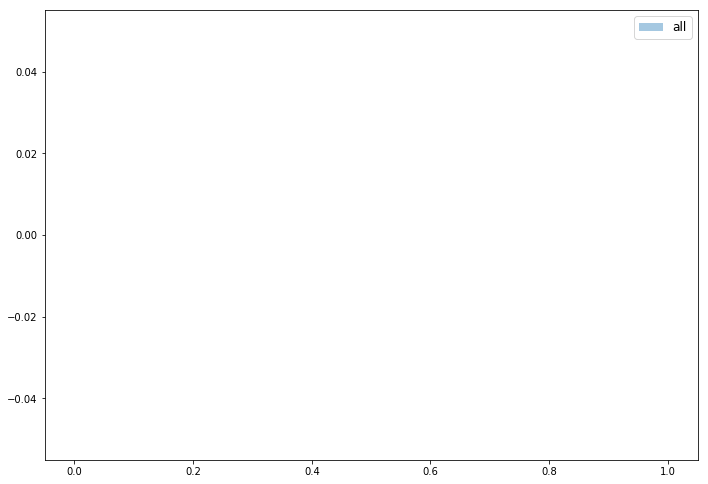

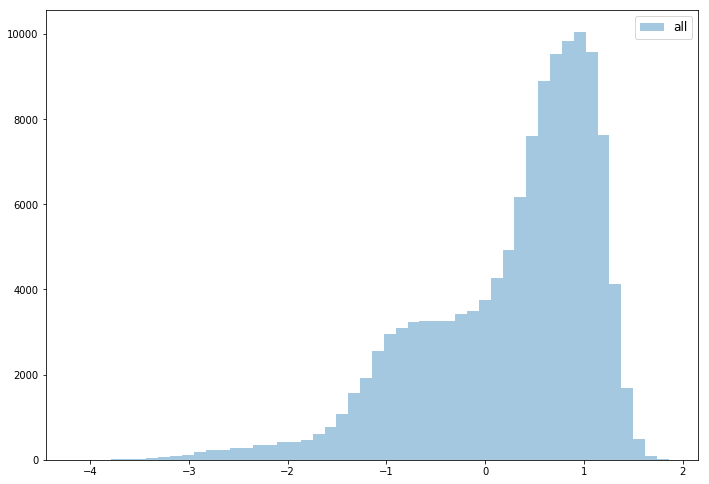

THRESH: 0.1
0 4222 4222


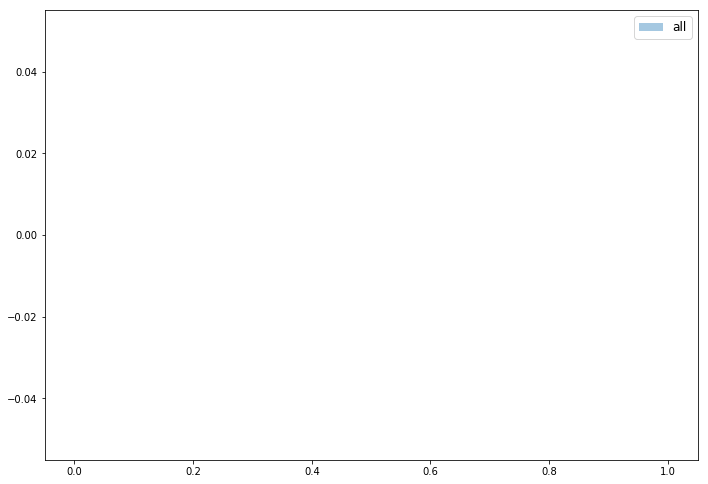

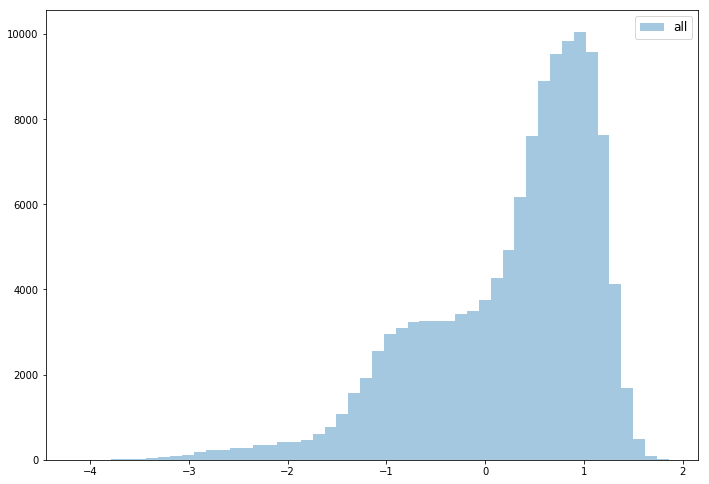

THRESH: 0.2
0 4222 4222


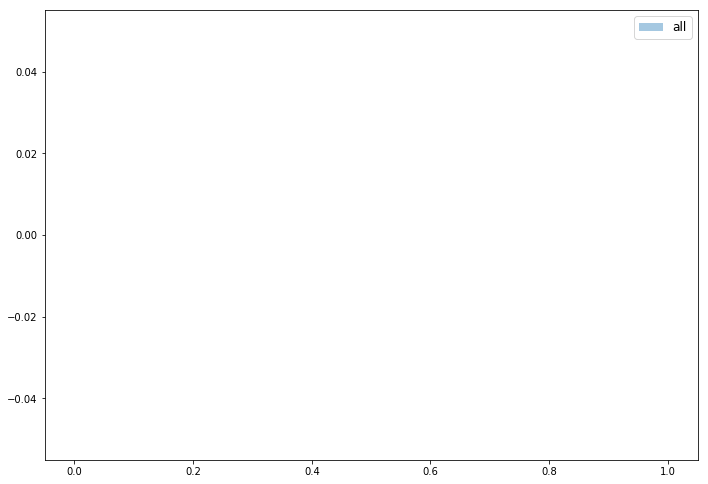

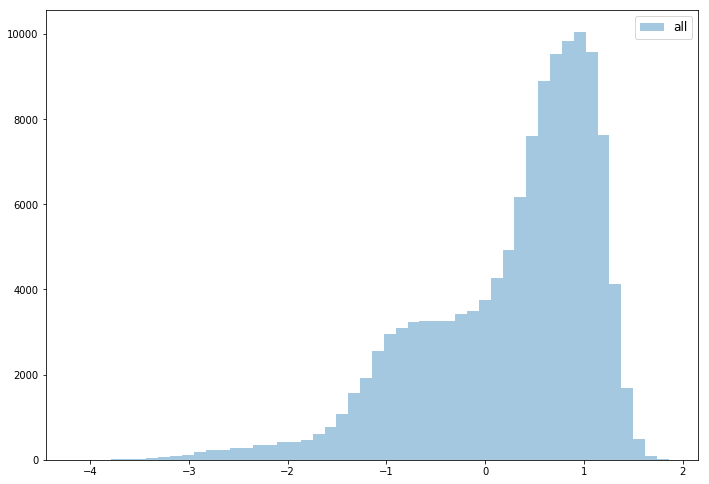

THRESH: 0.3
0 4222 4222


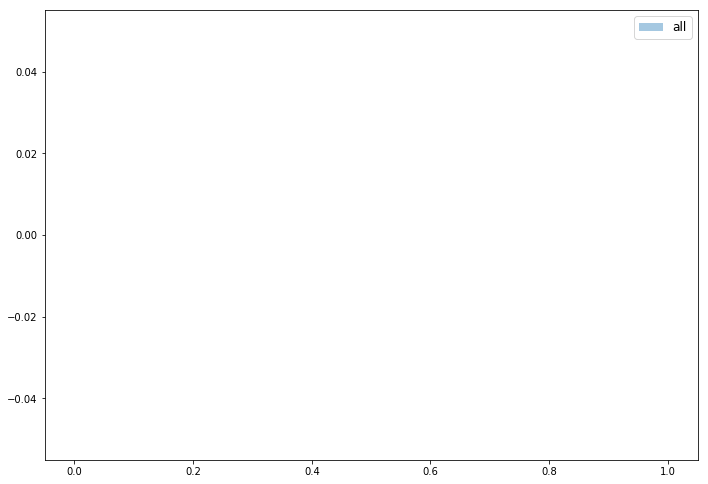

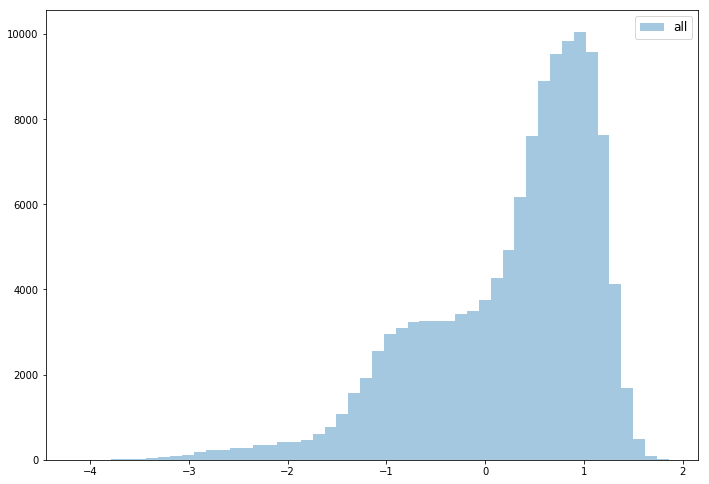

THRESH: 0.4
1 4221 4222


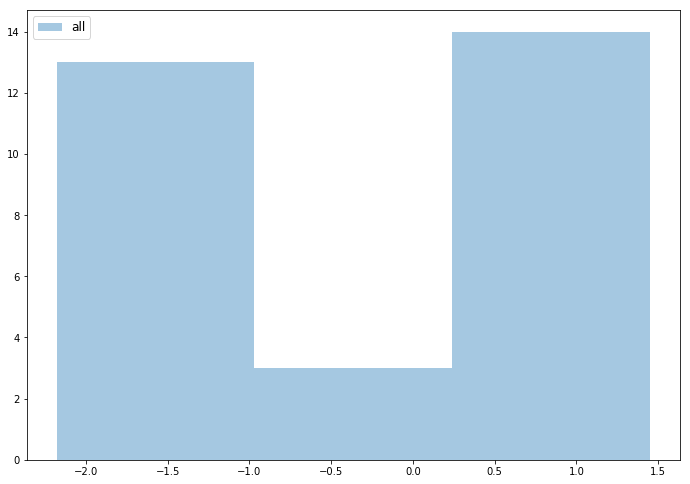

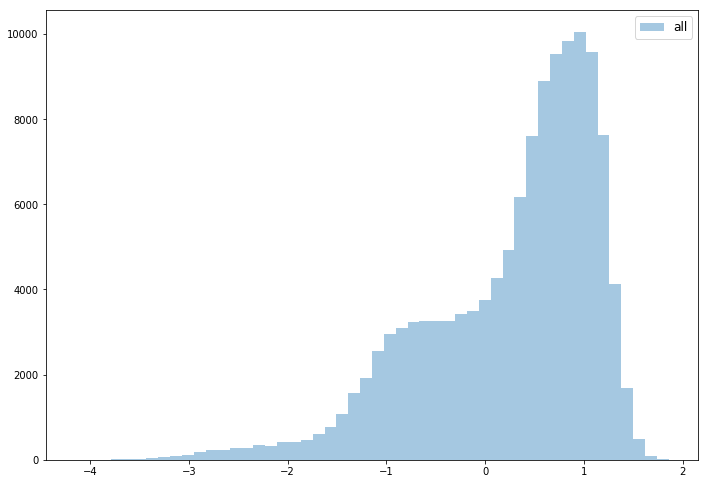

THRESH: 0.5
4 4218 4222


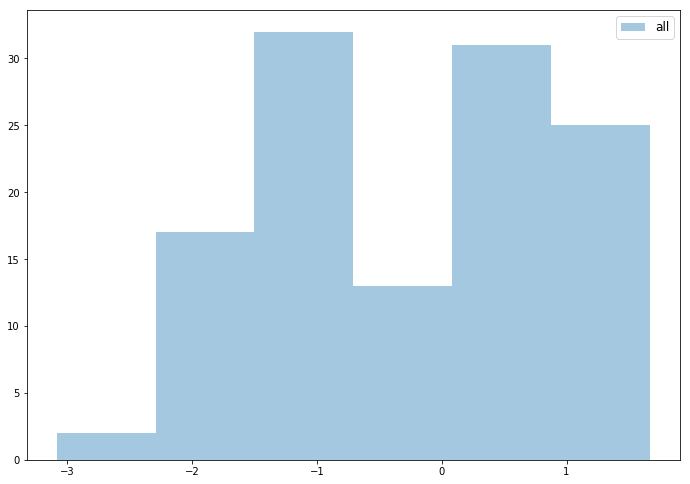

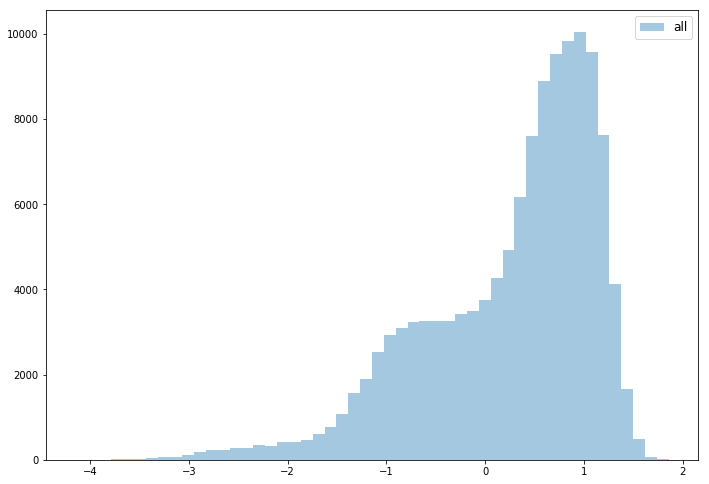

THRESH: 0.6
15 4207 4222


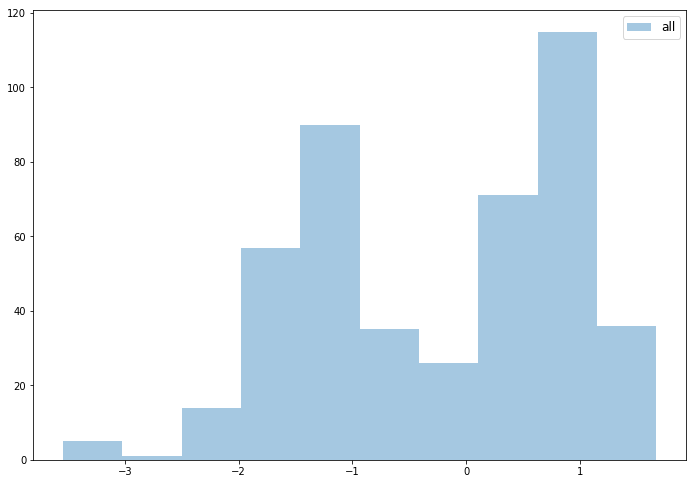

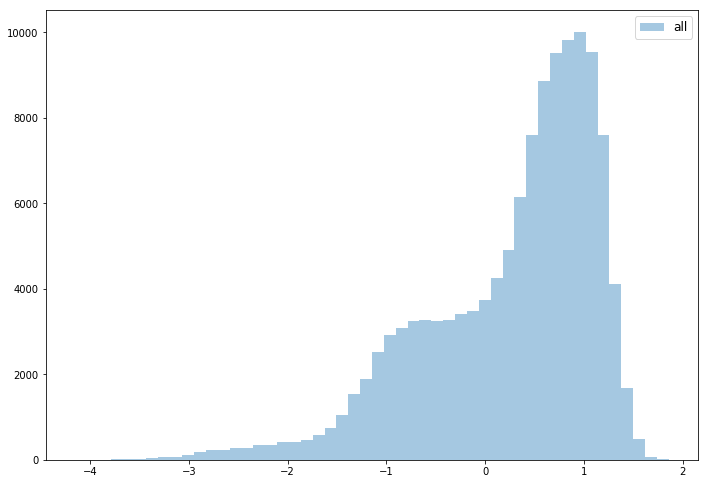

THRESH: 0.7
25 4197 4222


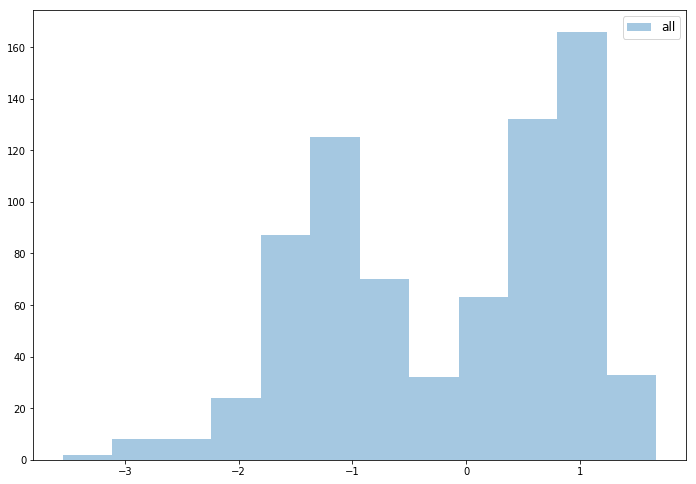

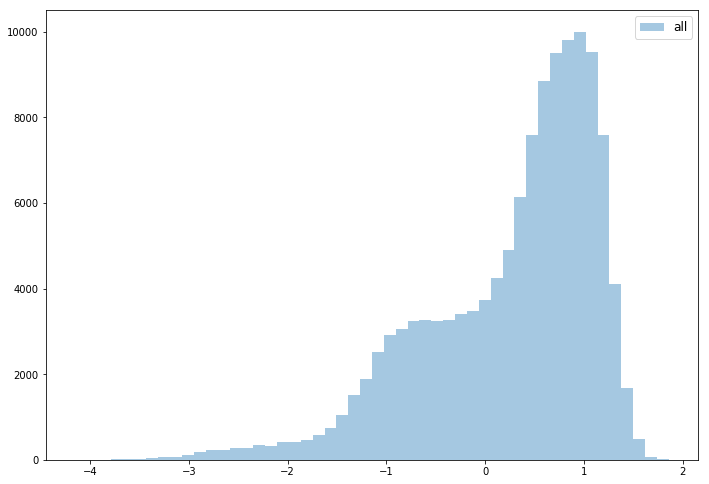

THRESH: 0.8
75 4147 4222


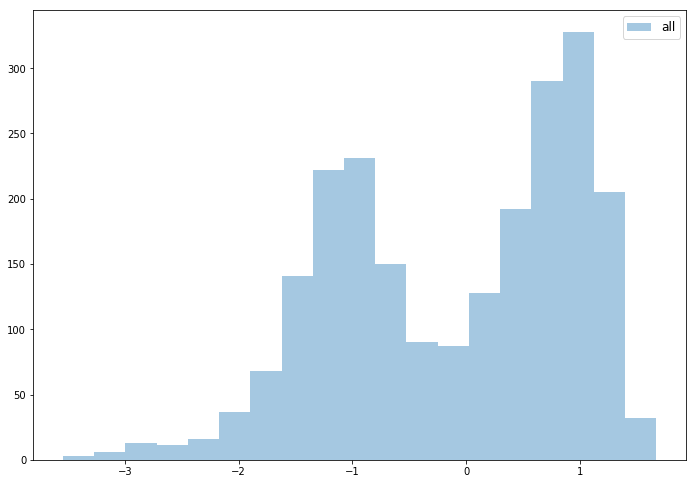

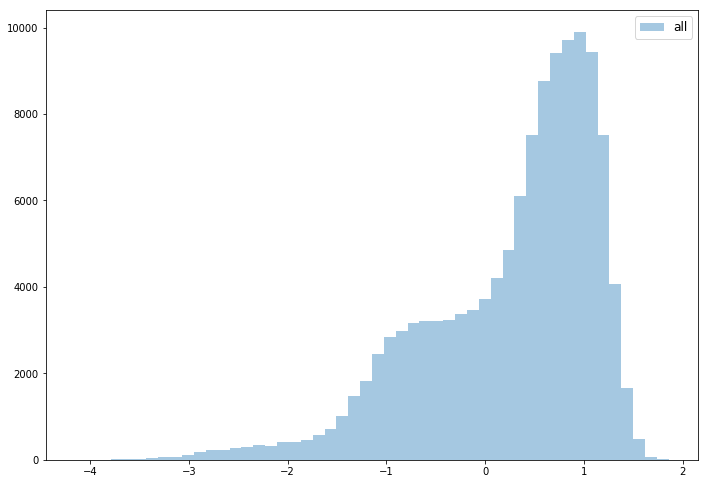

THRESH: 0.9
133 4089 4222


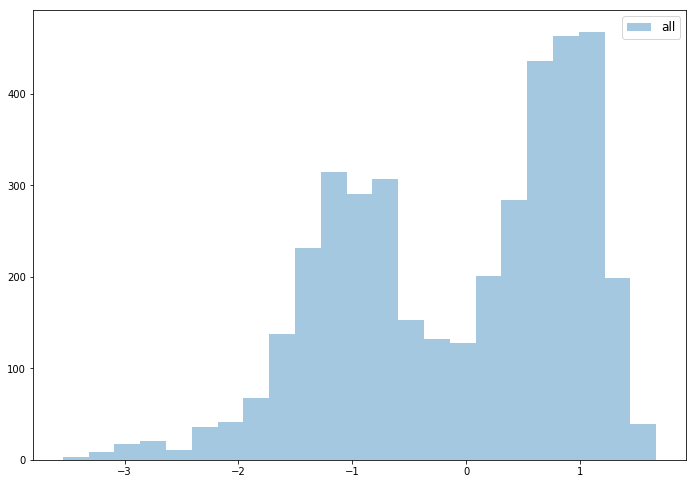

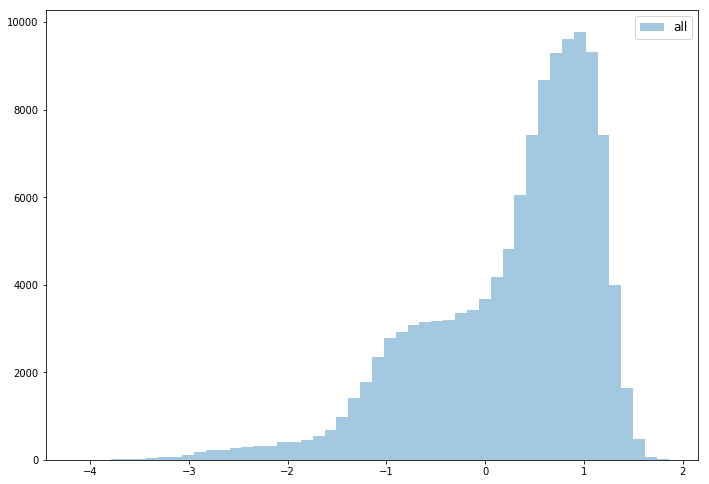

THRESH: 1.0
234 3988 4222


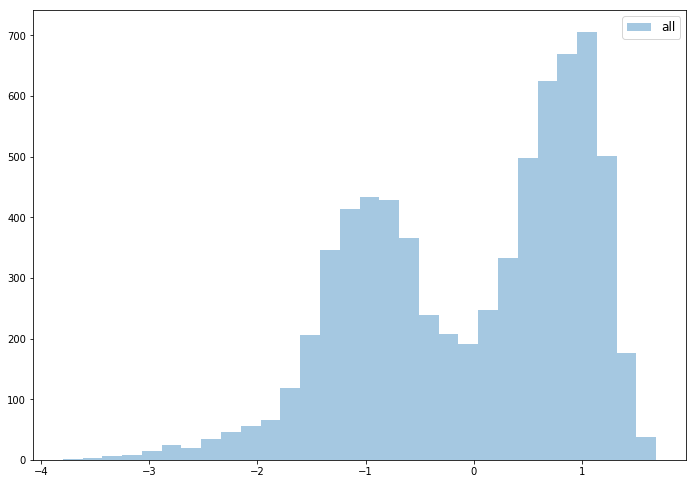

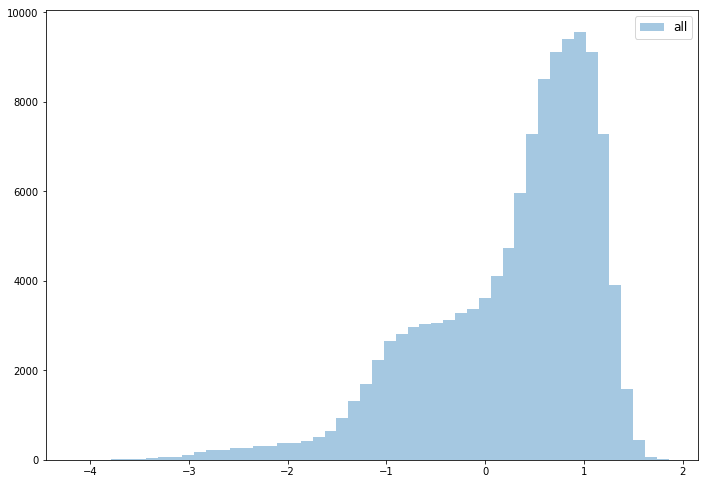

THRESH: 1.1
411 3811 4222


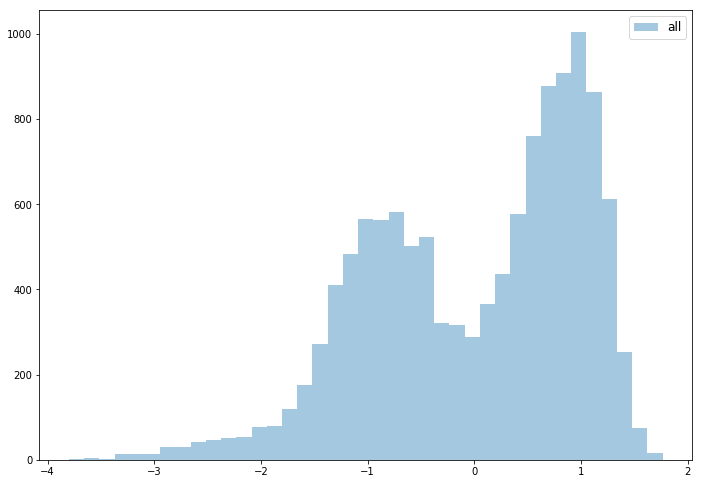

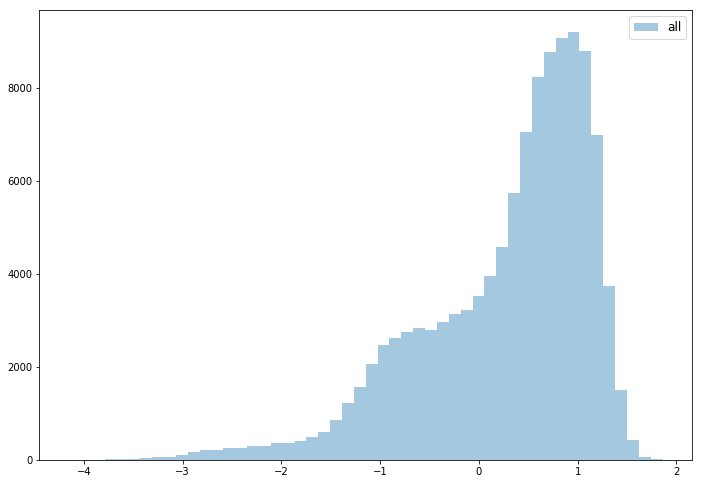

THRESH: 1.2
669 3553 4222


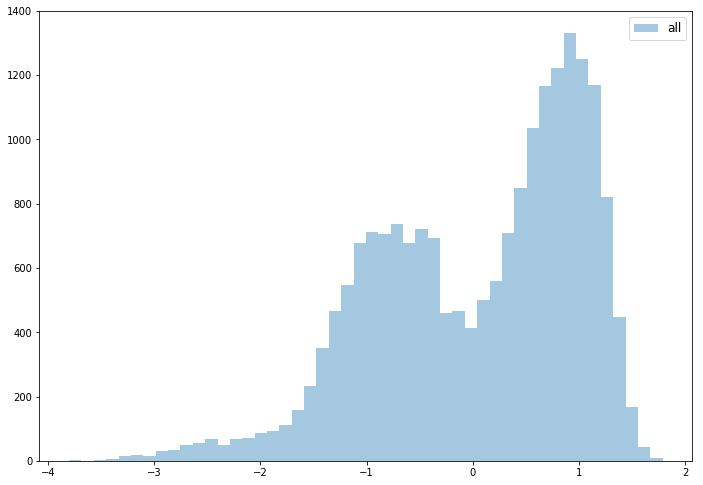

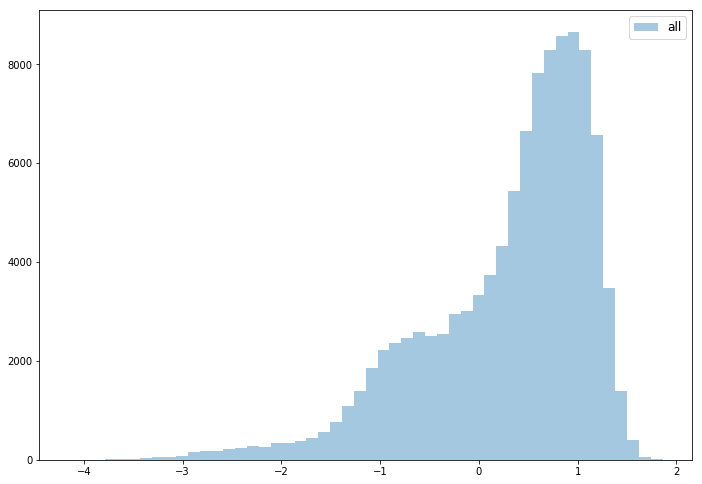

THRESH: 1.3
1024 3198 4222


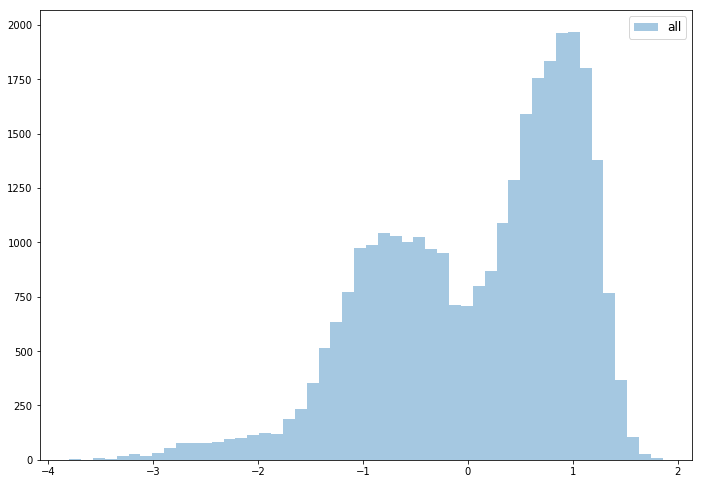

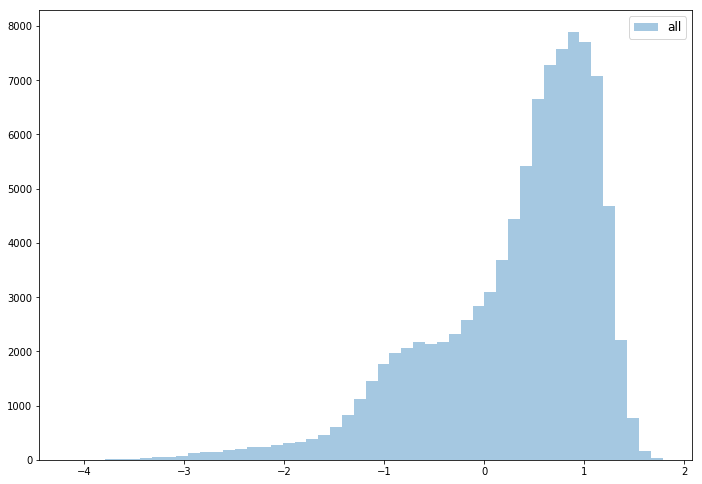

THRESH: 1.4
1463 2759 4222


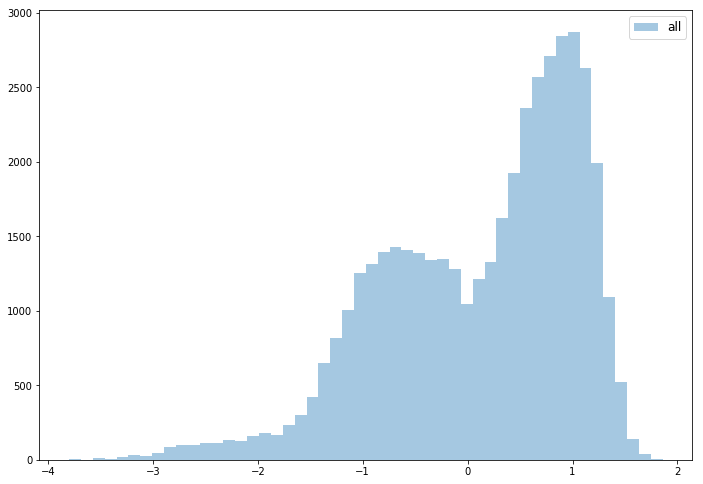

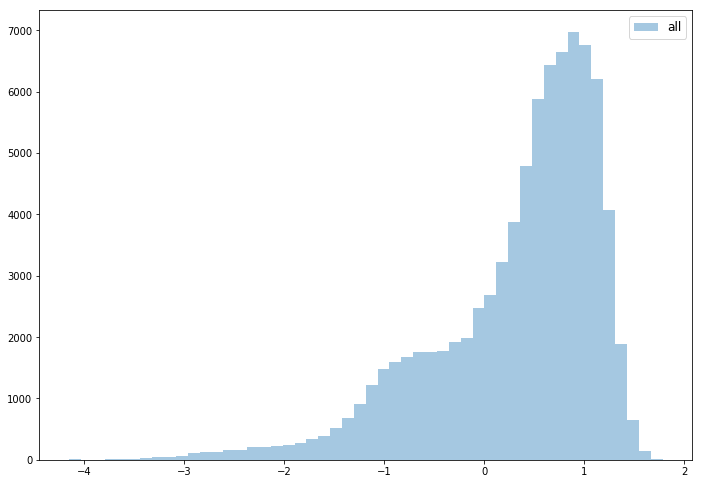

THRESH: 1.5
1974 2248 4222


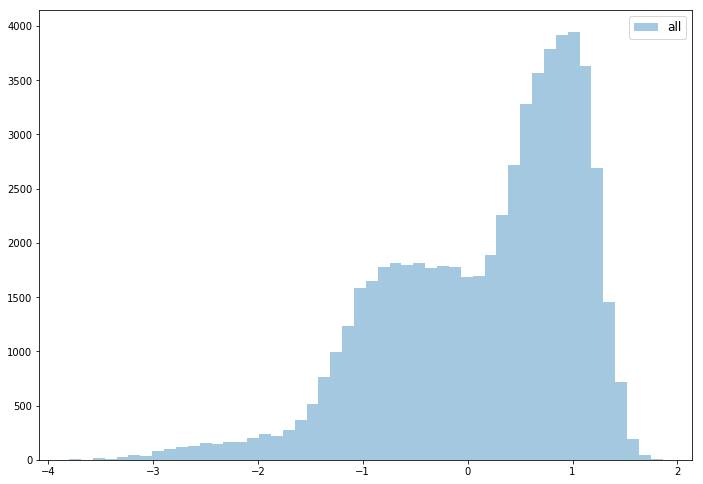

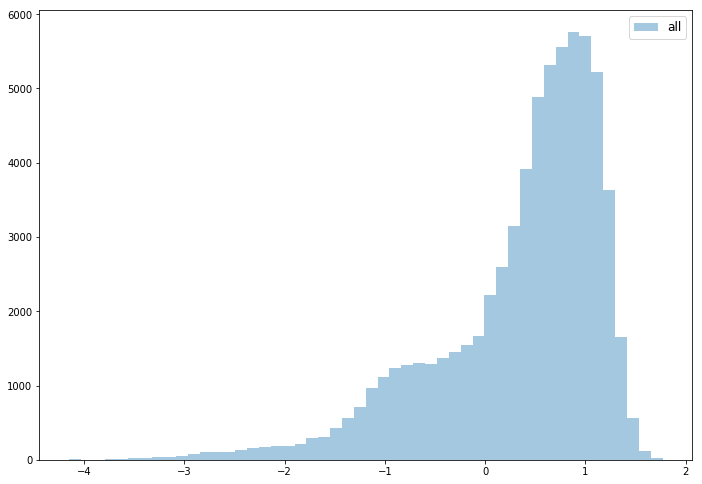

THRESH: 1.6
2532 1690 4222


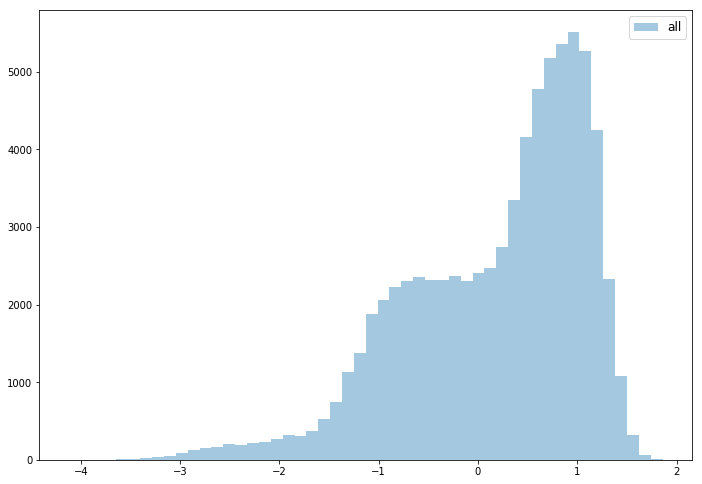

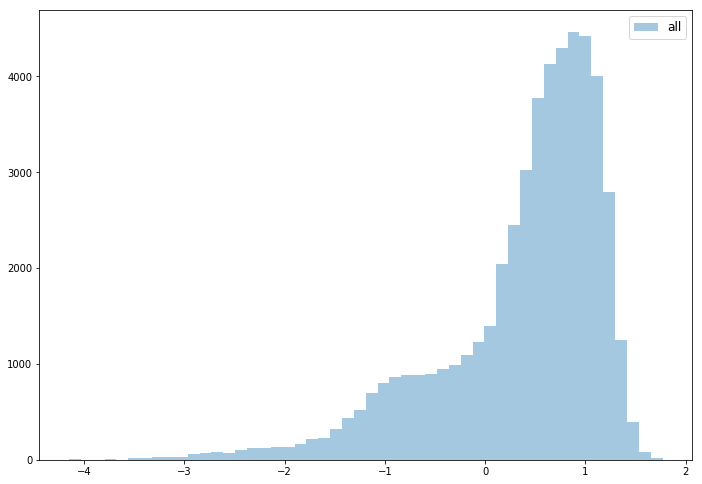

THRESH: 1.7
3108 1114 4222


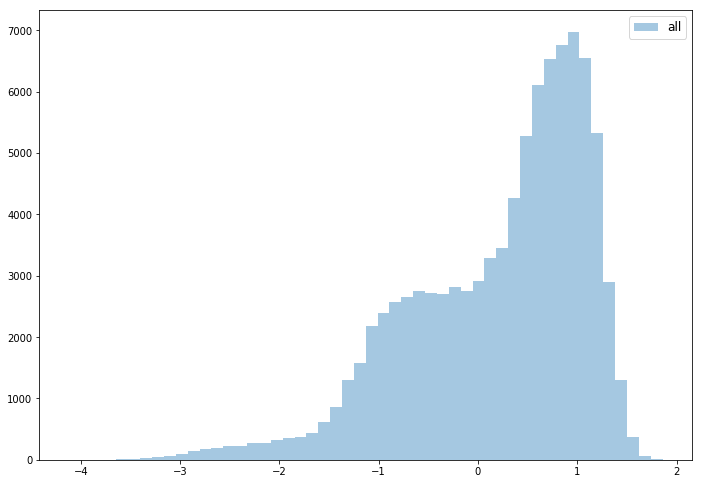

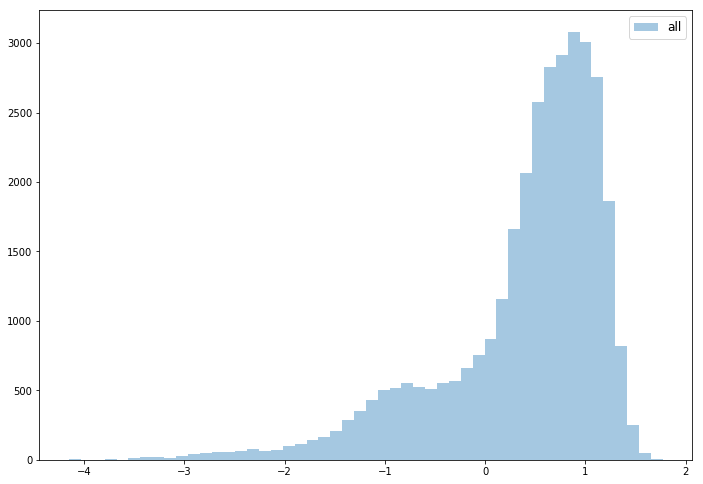

THRESH: 1.8
3658 564 4222


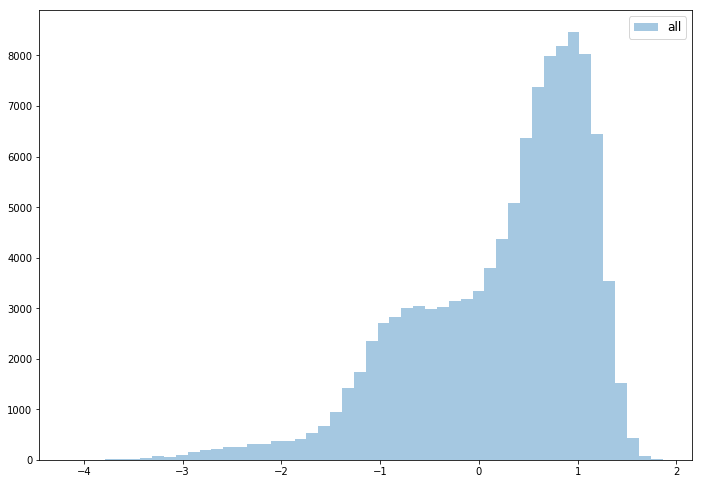

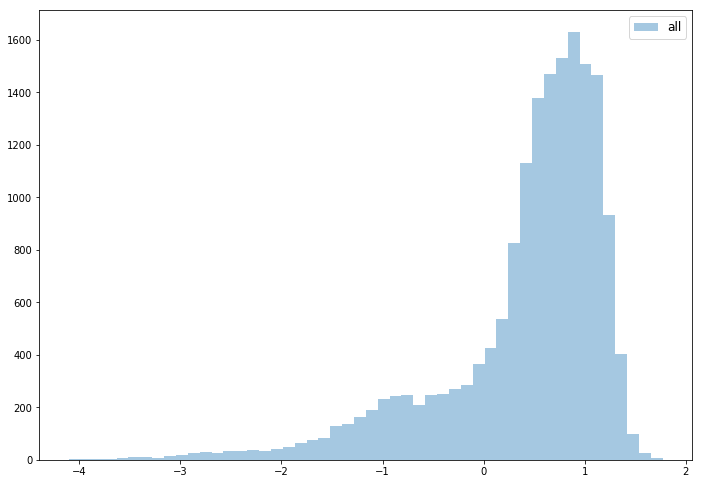

THRESH: 1.9
4075 147 4222


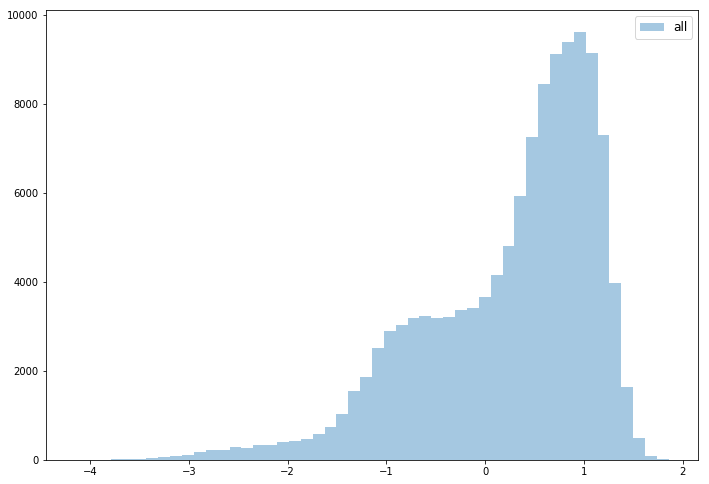

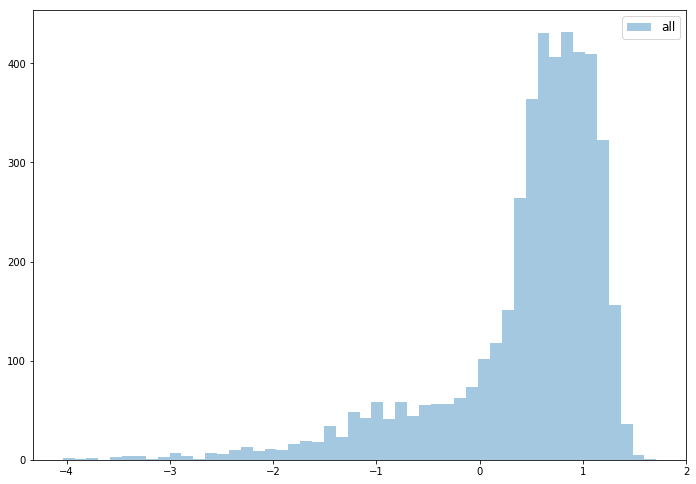

THRESH: 2.0
4211 11 4222


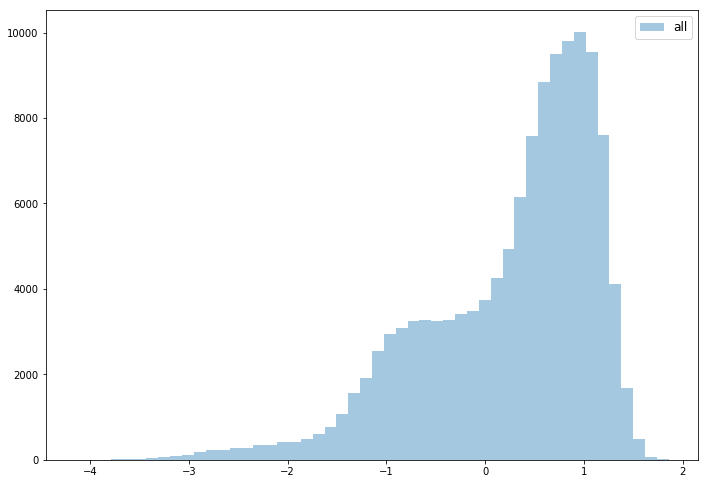

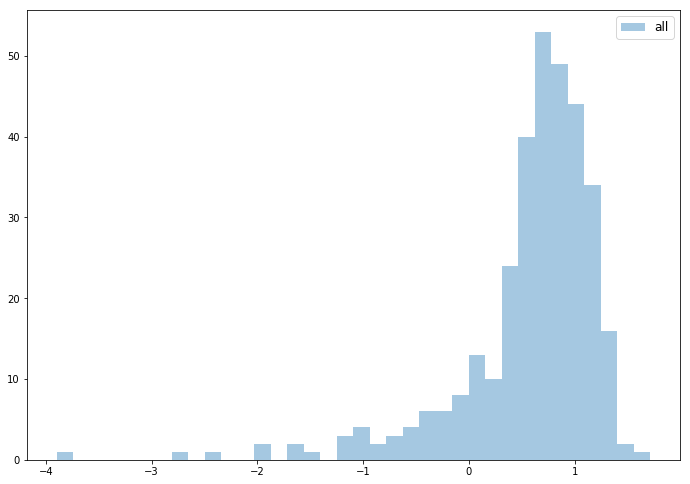

In [29]:
def has_peak_near(data,x,y,peak_idxs,trough_idxs, val, thresh):
    data_list = list(data)
    return sum([1 if (e <= val + thresh and e >= val - thresh) else 0 for e in data_list]) > 9

threshs = [k/10.0 for k in range(21)]
has_onep3_peak, no_onep3_peak = {}, {}
for thresh in threshs:
    has_onep3_peak[thresh] = []
    no_onep3_peak[thresh] = []
    
for idx,data in enumerate(sortyspre):
    if idx % 500 == 0: print idx
    f = sns.kdeplot(data)
    x,y = f.get_lines()[0].get_data()
    plt.clf()
    #print y
    ny=[-k for k in y]
    peak_idxs, trough_idxs = find_peaks(y)[0], find_peaks(ny)[0]
    peak_locs, trough_locs = [x[k] for k in peak_idxs], [x[k] for k in trough_idxs]
    for thresh in has_onep3_peak:
        if has_peak_near(data,x,y,peak_idxs,trough_idxs,-1.5,thresh):
            has_onep3_peak[thresh].append(idx)
        else:
            no_onep3_peak[thresh].append(idx)
            
has_eigs, doesnt_eigs = {}, {}
for thresh in threshs:
    has_eigs[thresh] = []
    doesnt_eigs[thresh] = []
    for idx in has_onep3_peak[thresh]:
        has_eigs[thresh].extend(sortyspre[idx])
    for idx in no_onep3_peak[thresh]:
        doesnt_eigs[thresh].extend(sortyspre[idx])

for thresh in threshs:
    print len(has_onep3_peak[thresh]), len(no_onep3_peak[thresh]), len(has_onep3_peak[thresh])+len(no_onep3_peak[thresh])

for thresh in threshs:
    print "THRESH:", thresh
    print len(has_onep3_peak[thresh]), len(no_onep3_peak[thresh]), len(has_onep3_peak[thresh])+len(no_onep3_peak[thresh])
    sns.distplot(has_eigs[thresh], kde=False, label='all', norm_hist = False)
    plt.legend(prop={'size':12})
    plt.show()
    sns.distplot(doesnt_eigs[thresh], kde=False, label='all', norm_hist = False)
    plt.legend(prop={'size':12})
    plt.show()    

0
500
1000
1500
2000
2500
3000
3500
4000
0 4222 4222
19 4203 4222
87 4135 4222
269 3953 4222
499 3723 4222
906 3316 4222
1442 2780 4222
2070 2152 4222
2685 1537 4222
3227 995 4222
3609 613 4222
3877 345 4222
4036 186 4222
4151 71 4222
4192 30 4222
4217 5 4222
4220 2 4222
4222 0 4222
4222 0 4222
4222 0 4222
4222 0 4222
THRESH: 0.0
0 4222 4222


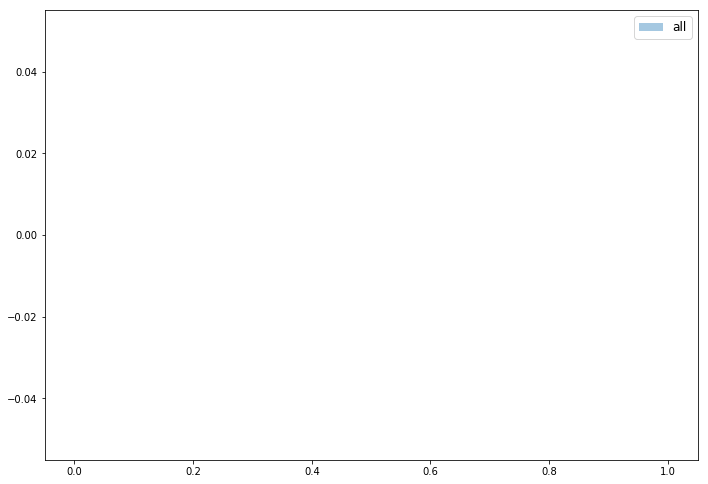

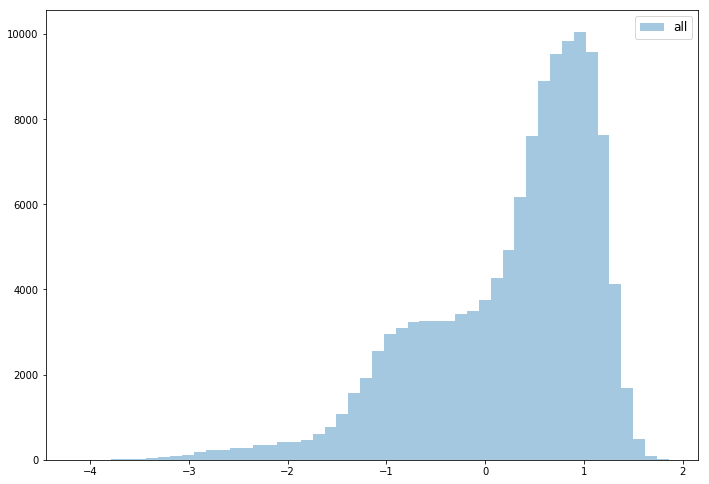

THRESH: 0.1
19 4203 4222


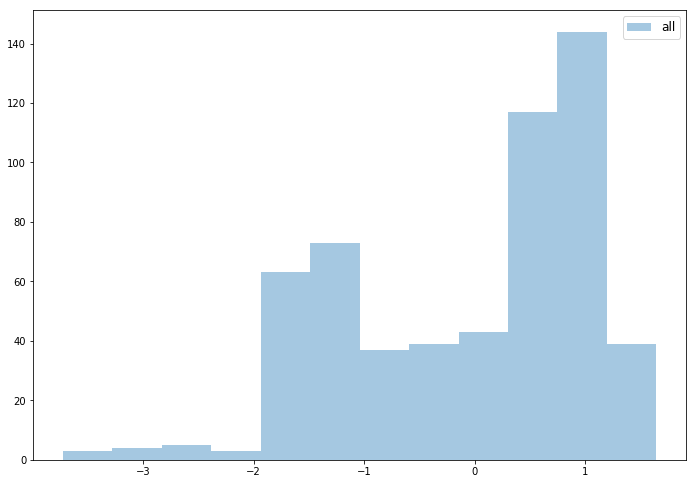

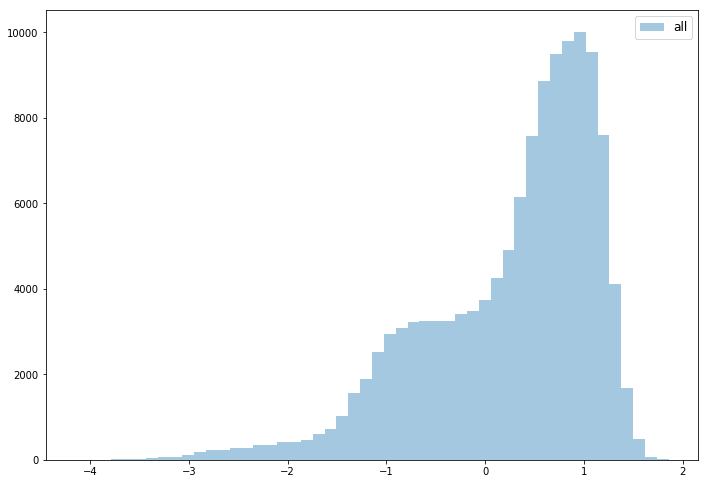

THRESH: 0.2
87 4135 4222


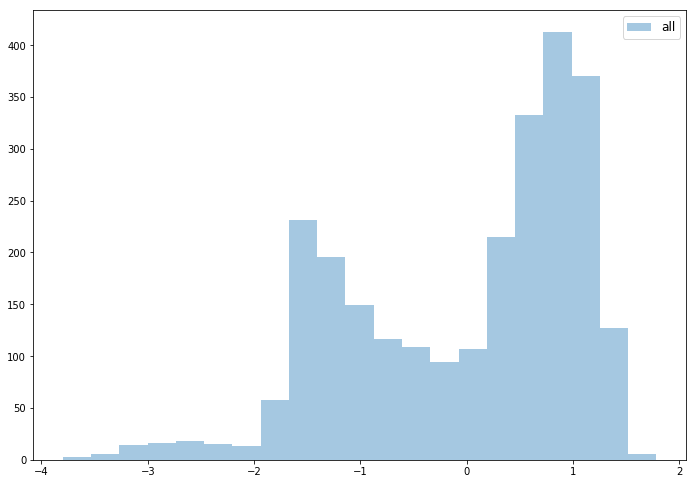

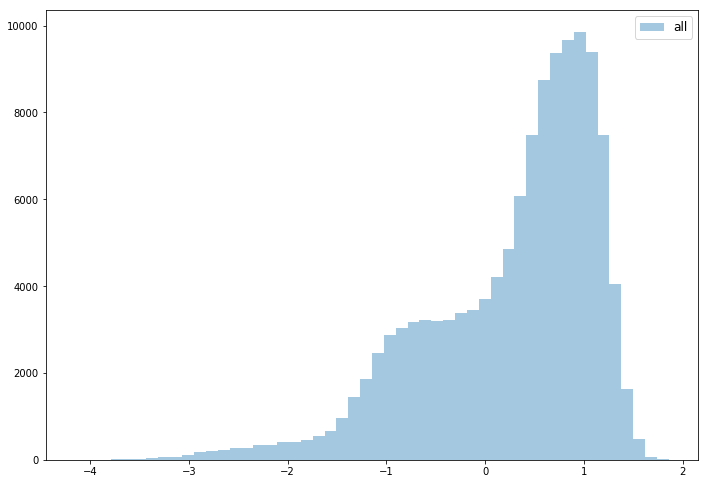

THRESH: 0.3
269 3953 4222


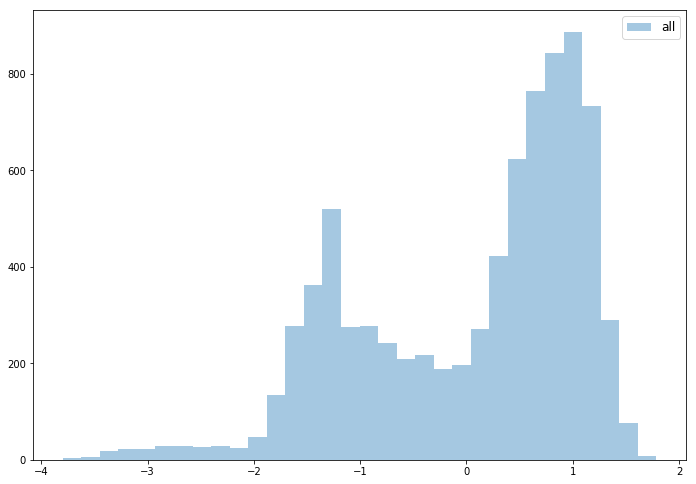

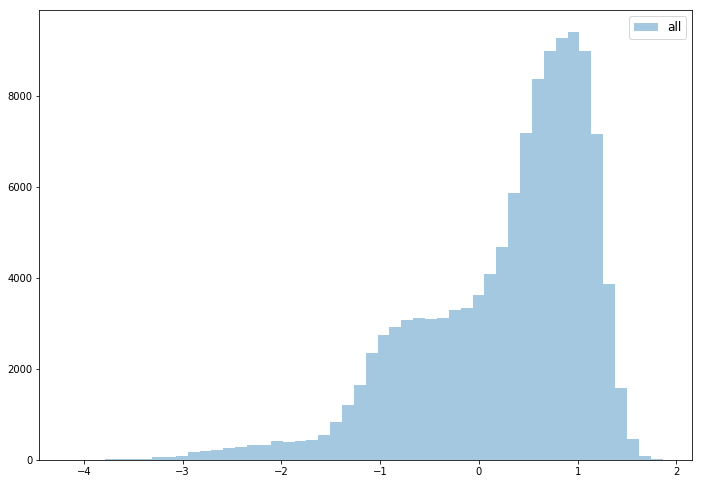

THRESH: 0.4
499 3723 4222


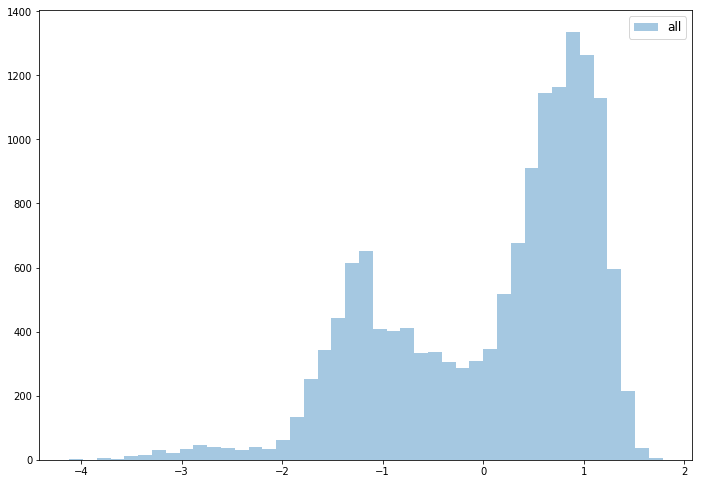

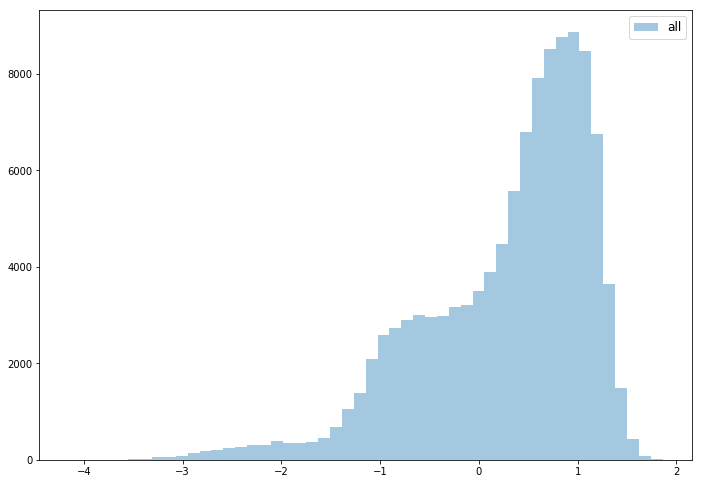

THRESH: 0.5
906 3316 4222


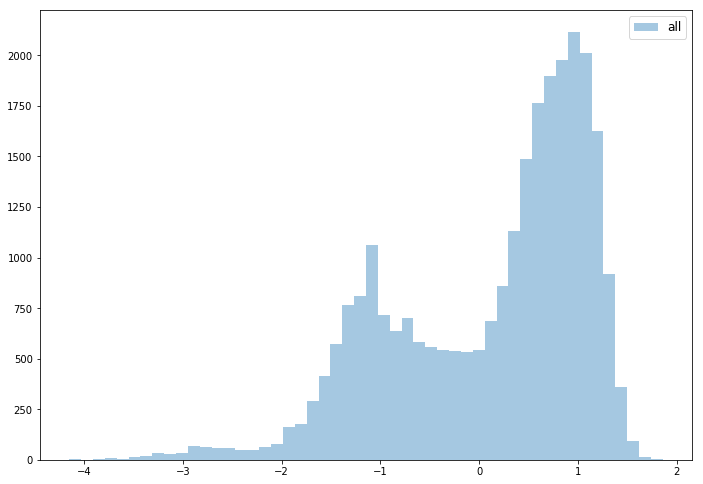

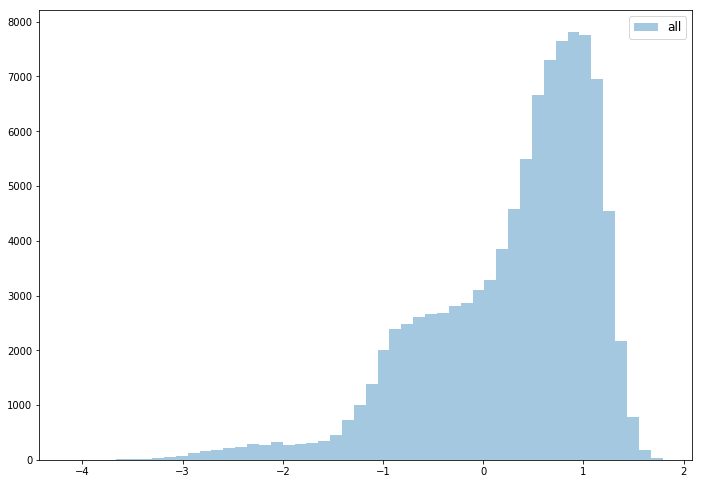

THRESH: 0.6
1442 2780 4222


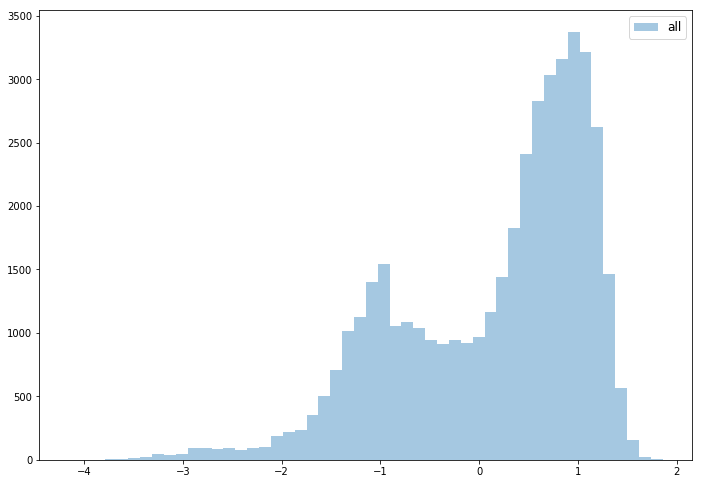

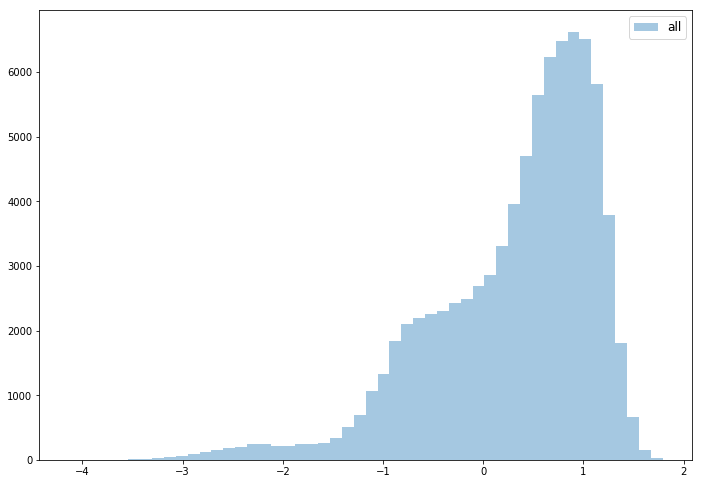

THRESH: 0.7
2070 2152 4222


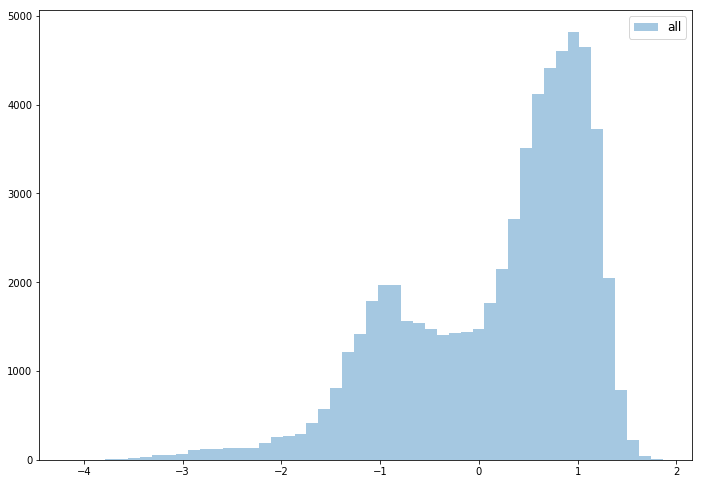

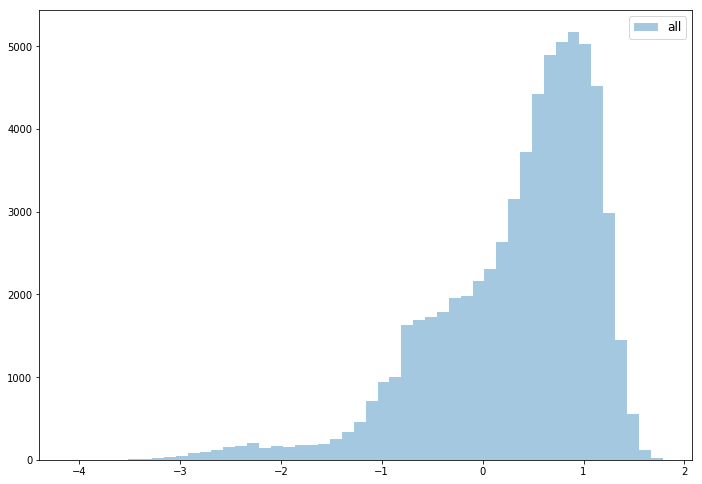

THRESH: 0.8
2685 1537 4222


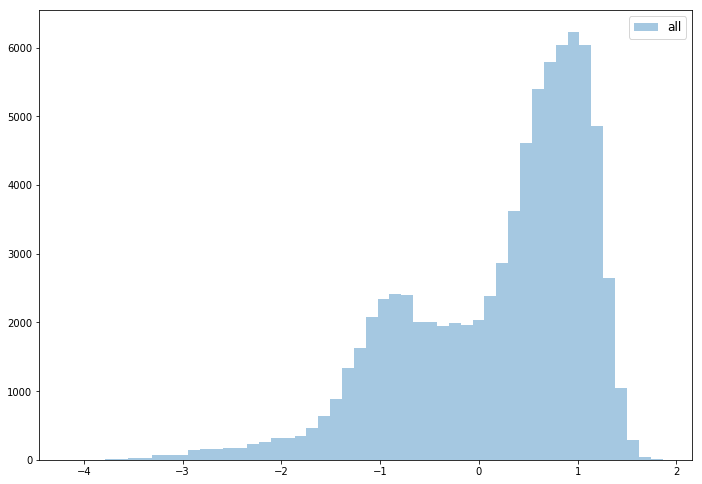

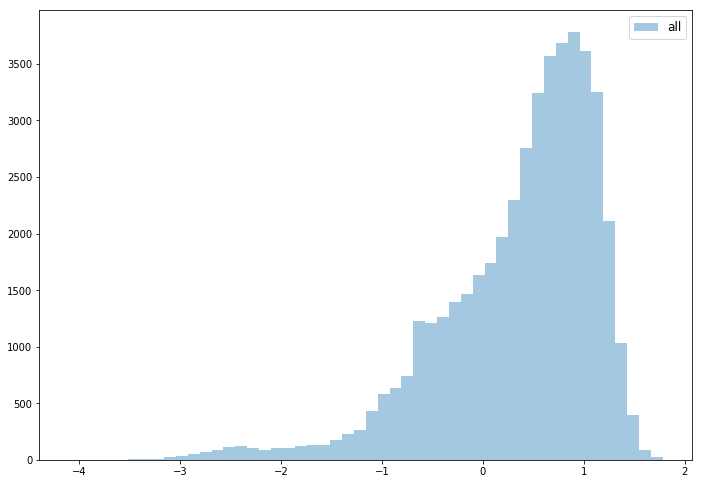

THRESH: 0.9
3227 995 4222


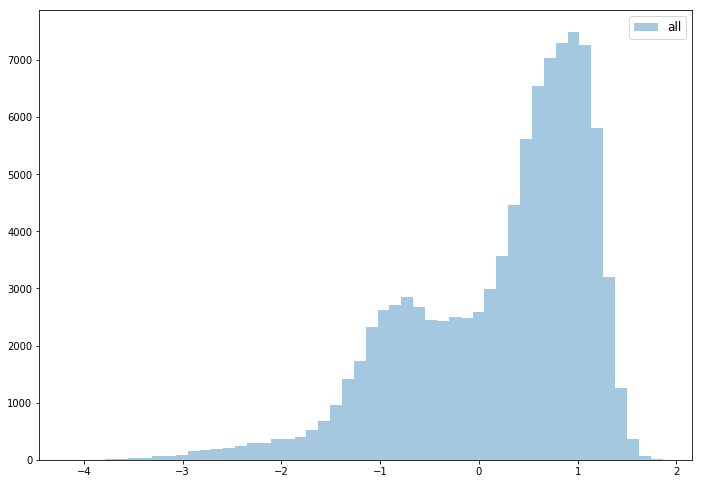

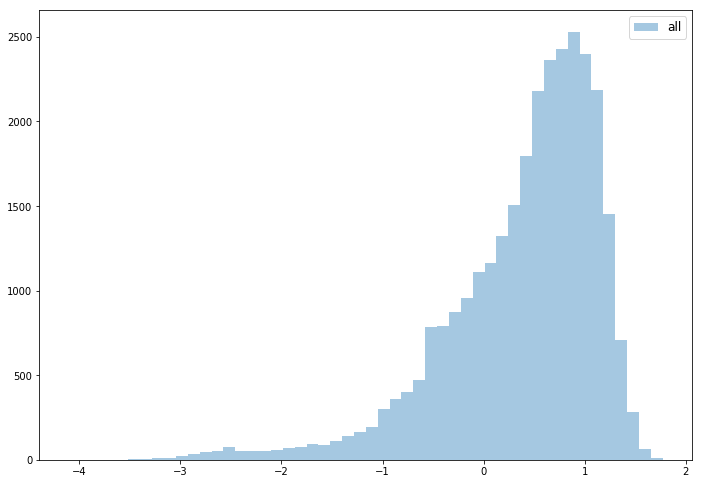

THRESH: 1.0
3609 613 4222


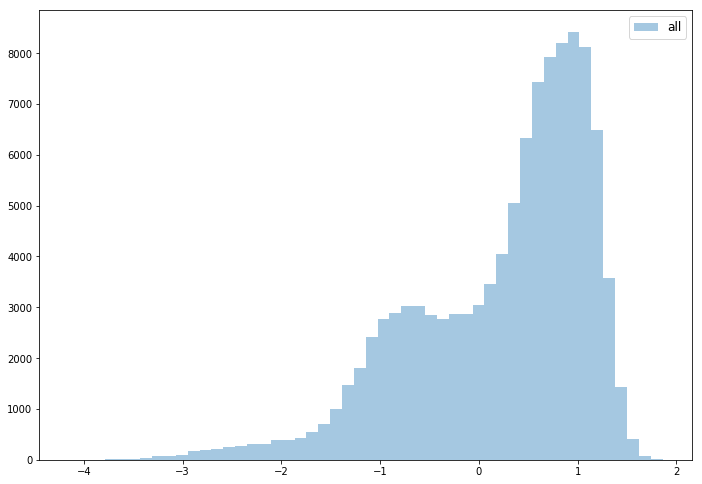

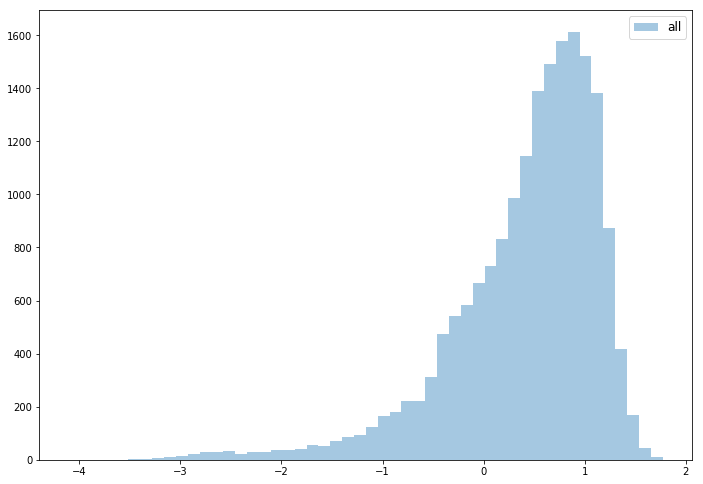

THRESH: 1.1
3877 345 4222


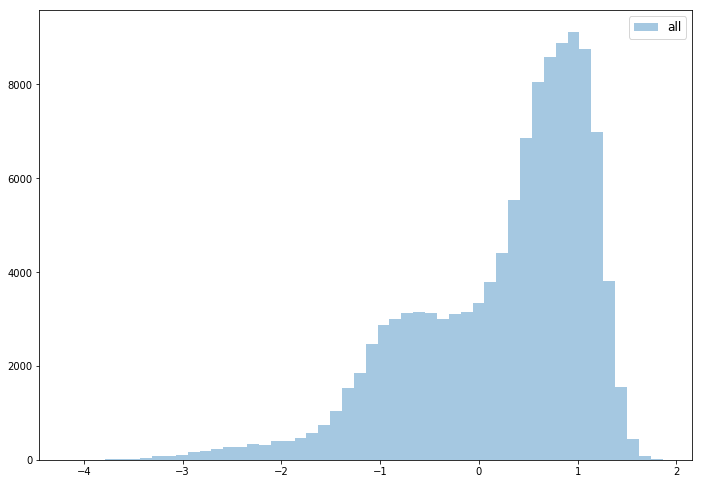

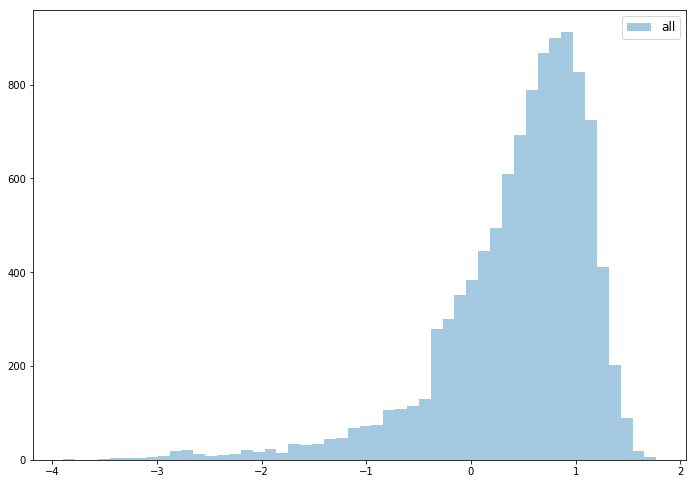

THRESH: 1.2
4036 186 4222


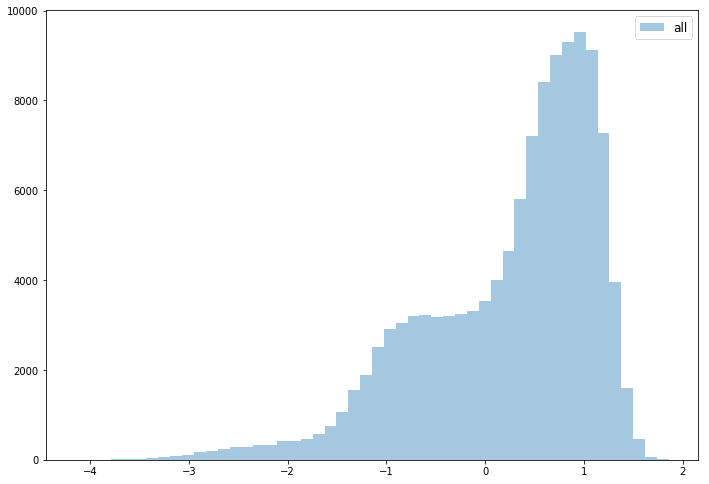

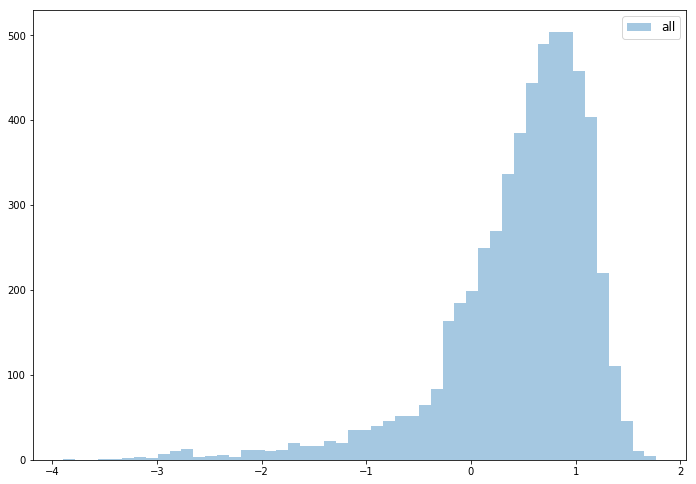

THRESH: 1.3
4151 71 4222


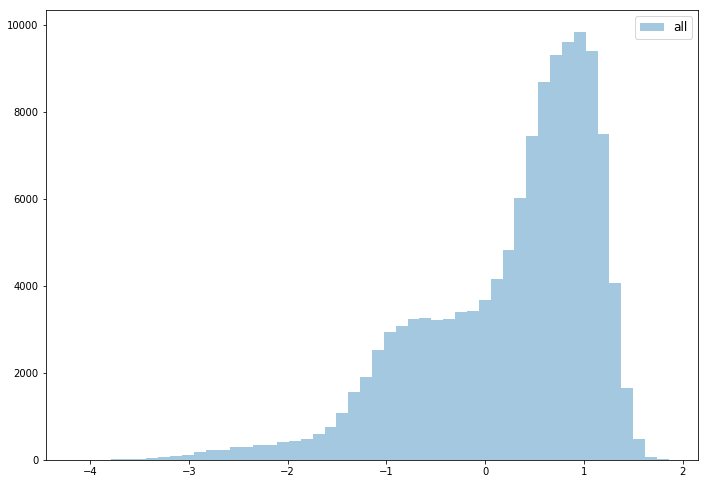

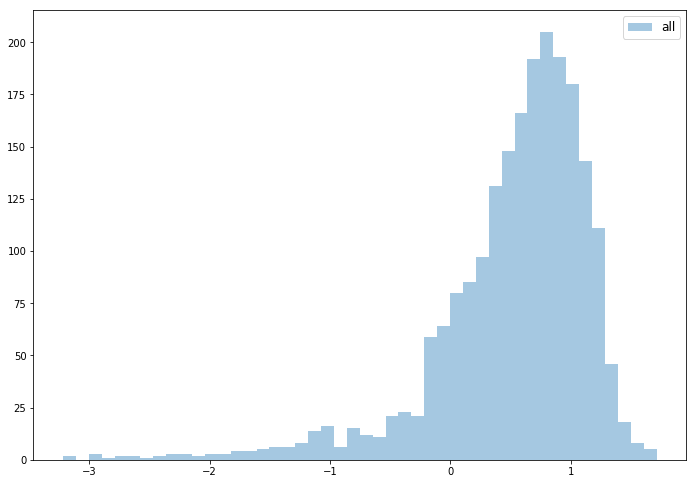

THRESH: 1.4
4192 30 4222


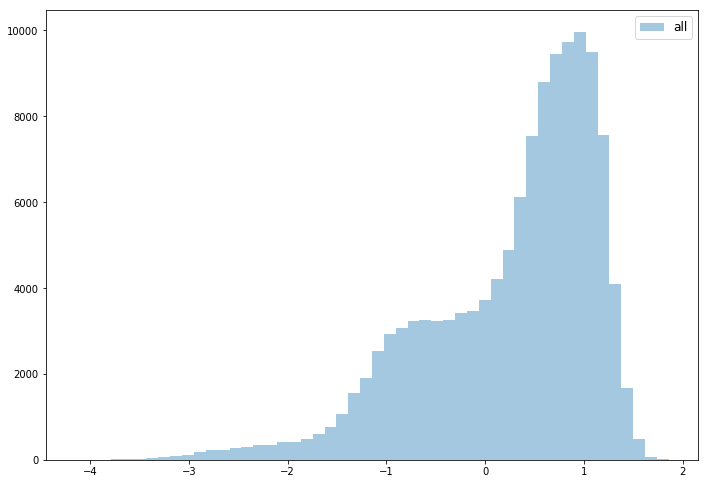

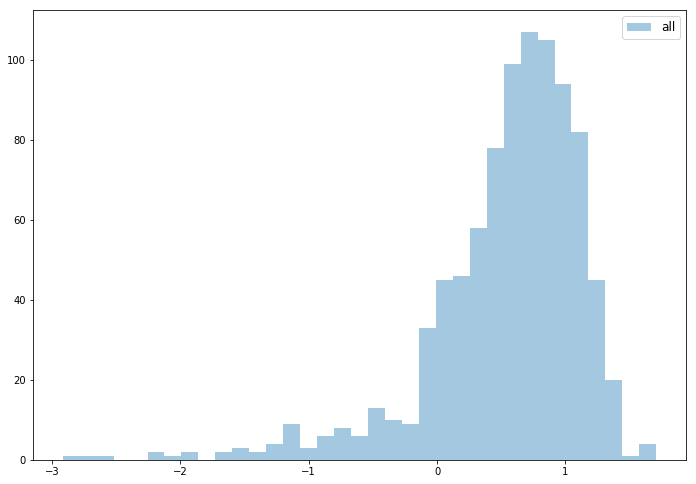

THRESH: 1.5
4217 5 4222


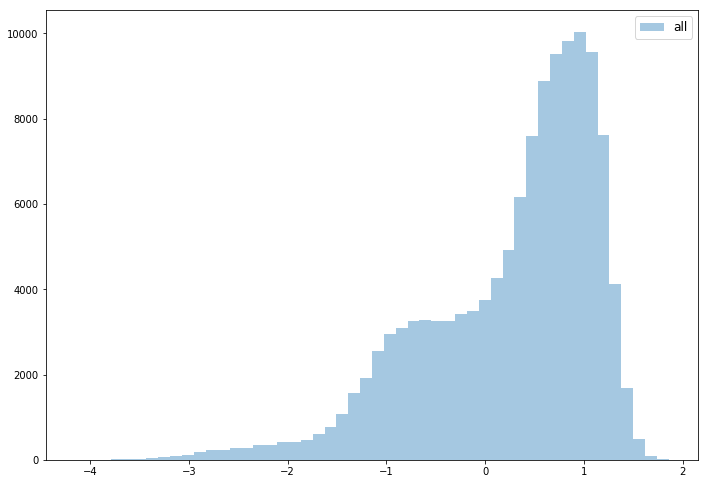

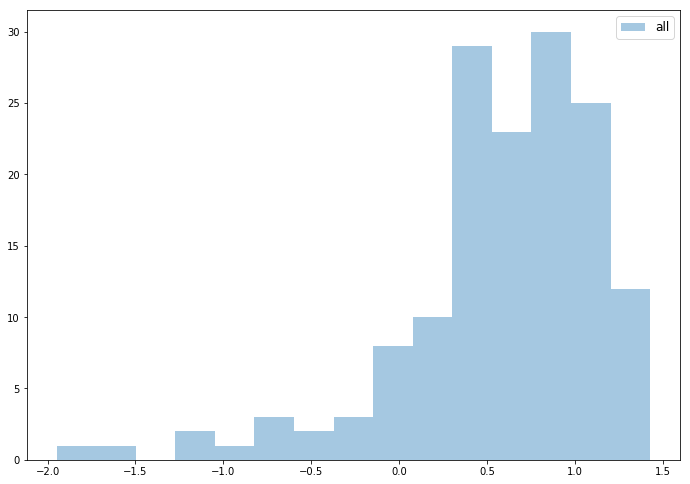

THRESH: 1.6
4220 2 4222


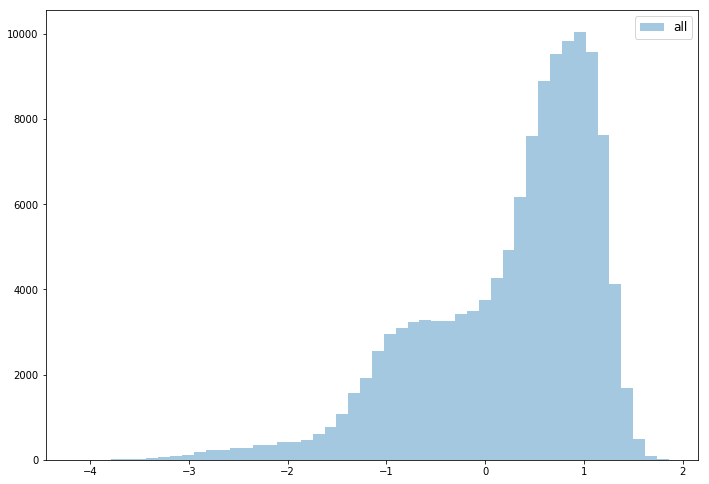

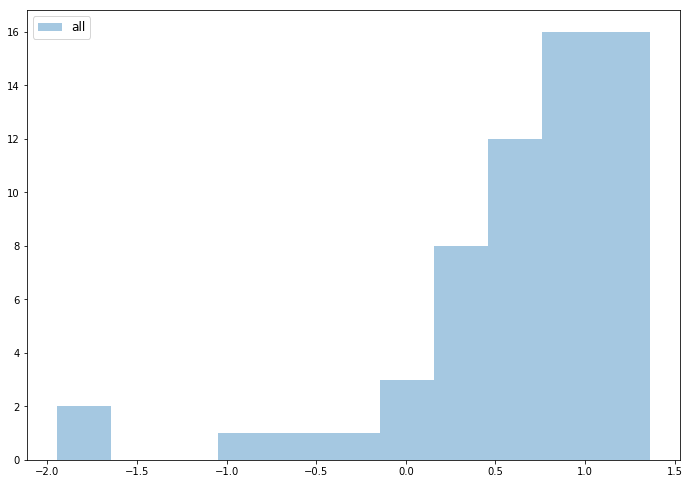

THRESH: 1.7
4222 0 4222


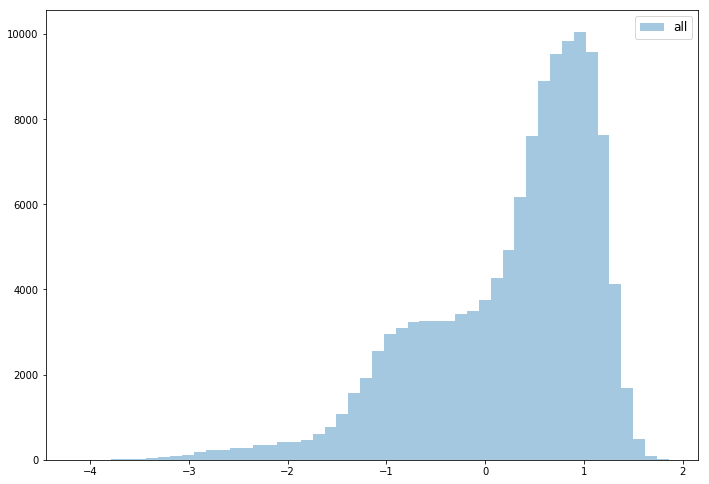

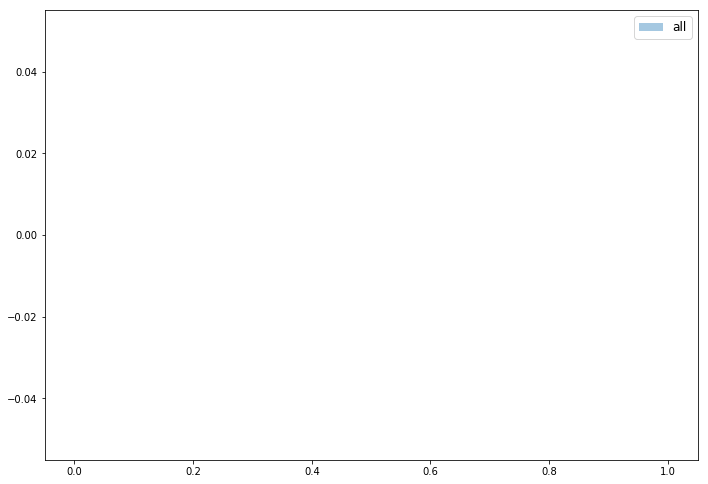

THRESH: 1.8
4222 0 4222


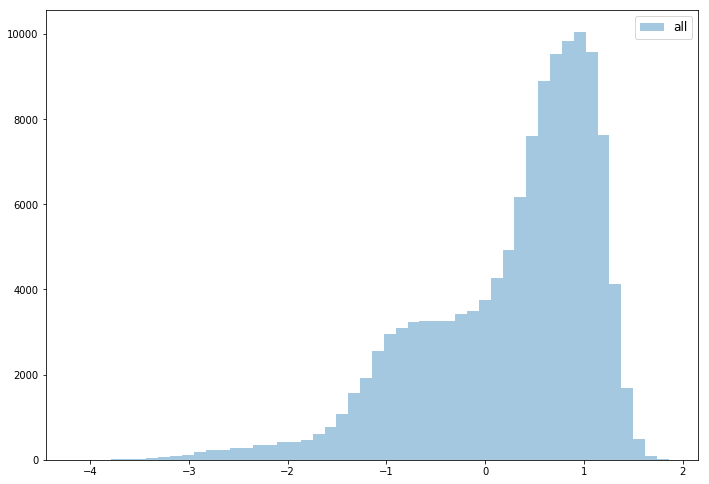

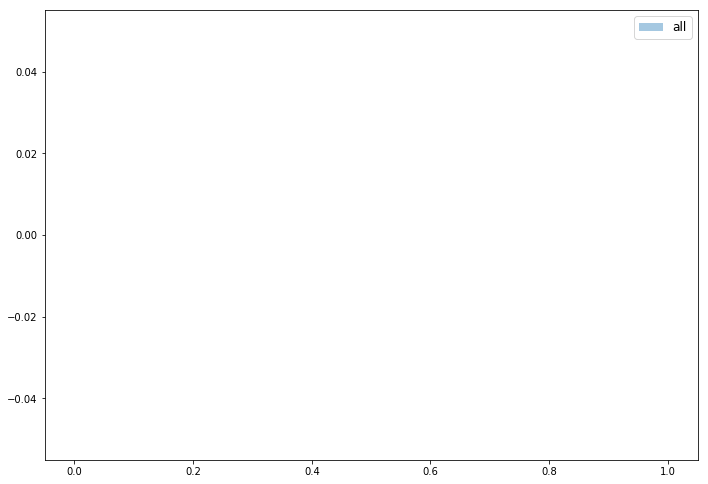

THRESH: 1.9
4222 0 4222


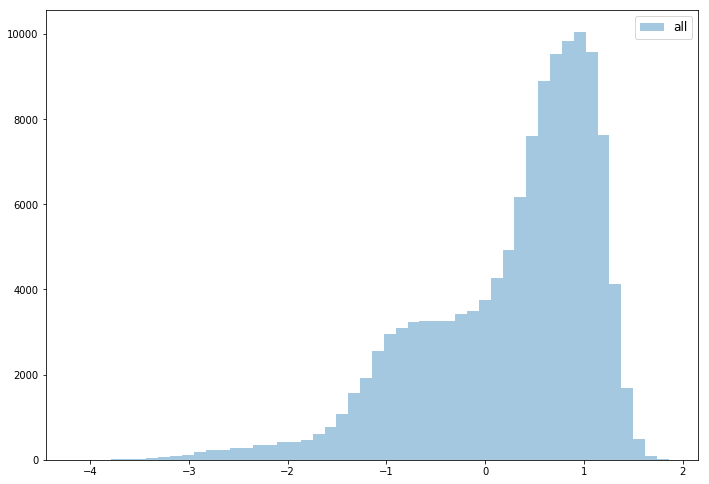

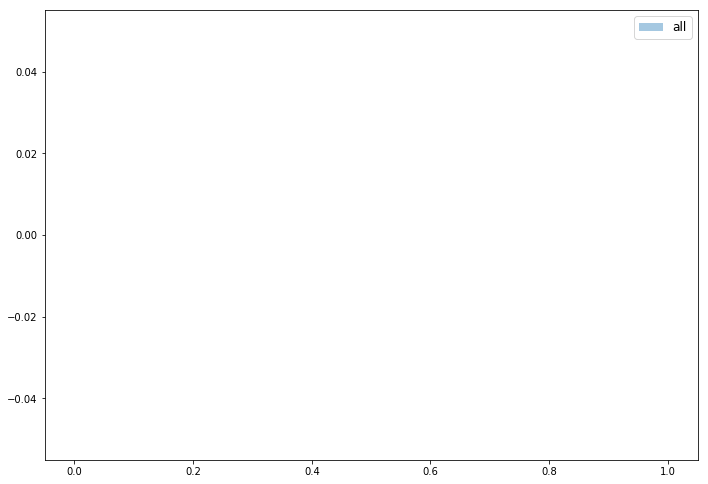

THRESH: 2.0
4222 0 4222


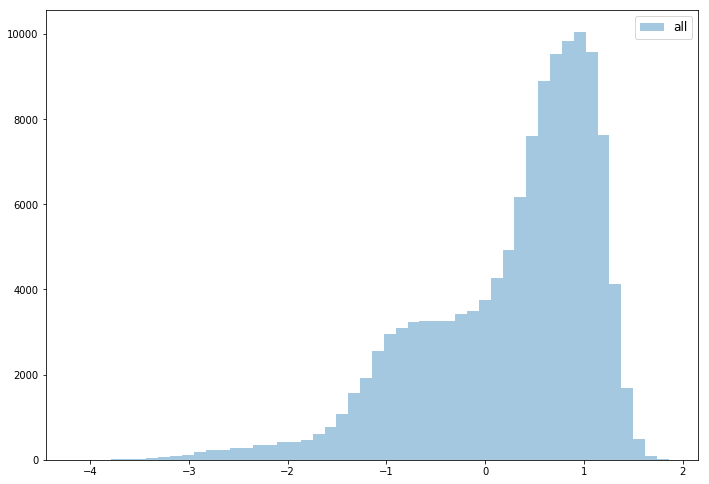

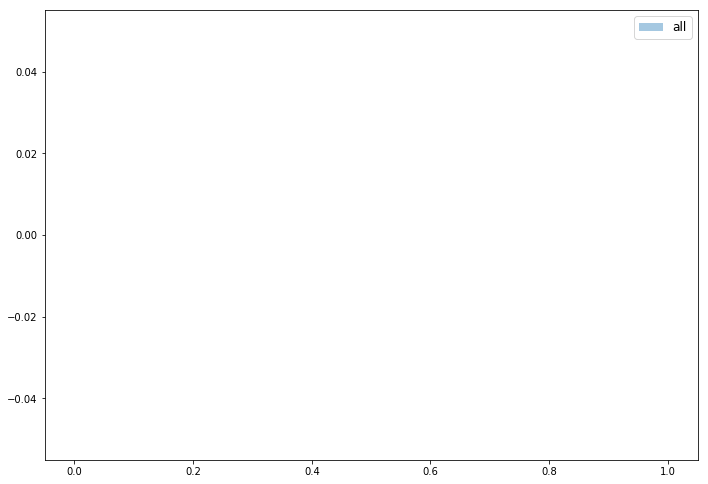

In [30]:
def has_peak_near(data,x,y,peak_idxs,trough_idxs, val, thresh):
    data_list = list(data)
    return sum([1 if (e <= val + thresh and e >= val - thresh) else 0 for e in data_list]) > 3

threshs = [k/10.0 for k in range(21)]
has_onep3_peak, no_onep3_peak = {}, {}
for thresh in threshs:
    has_onep3_peak[thresh] = []
    no_onep3_peak[thresh] = []
    
for idx,data in enumerate(sortyspre):
    if idx % 500 == 0: print idx
    f = sns.kdeplot(data)
    x,y = f.get_lines()[0].get_data()
    plt.clf()
    #print y
    ny=[-k for k in y]
    peak_idxs, trough_idxs = find_peaks(y)[0], find_peaks(ny)[0]
    peak_locs, trough_locs = [x[k] for k in peak_idxs], [x[k] for k in trough_idxs]
    for thresh in has_onep3_peak:
        if has_peak_near(data,x,y,peak_idxs,trough_idxs,-1.5,thresh):
            has_onep3_peak[thresh].append(idx)
        else:
            no_onep3_peak[thresh].append(idx)
            
has_eigs, doesnt_eigs = {}, {}
for thresh in threshs:
    has_eigs[thresh] = []
    doesnt_eigs[thresh] = []
    for idx in has_onep3_peak[thresh]:
        has_eigs[thresh].extend(sortyspre[idx])
    for idx in no_onep3_peak[thresh]:
        doesnt_eigs[thresh].extend(sortyspre[idx])

for thresh in threshs:
    print len(has_onep3_peak[thresh]), len(no_onep3_peak[thresh]), len(has_onep3_peak[thresh])+len(no_onep3_peak[thresh])

for thresh in threshs:
    print "THRESH:", thresh
    print len(has_onep3_peak[thresh]), len(no_onep3_peak[thresh]), len(has_onep3_peak[thresh])+len(no_onep3_peak[thresh])
    sns.distplot(has_eigs[thresh], kde=False, label='all', norm_hist = False)
    plt.legend(prop={'size':12})
    plt.show()
    sns.distplot(doesnt_eigs[thresh], kde=False, label='all', norm_hist = False)
    plt.legend(prop={'size':12})
    plt.show()    

# Read in topological data

There's a lot of it, and will mash it around a bit, too!

Note: it looks like the $>6$ data works best, **so make sure not to load the $>9$ or $>3$ data**.

In [9]:
#import top data, correlate with eigenvalue spectra
top_files = [d for d in os.listdir('top_data') if d[0] == 'h' and 'topdata_ints' in d]
print('num files', len(top_files))
assert_mismatch = []
def top_info_from_file(file):
    h11 = int(file.split("_")[1])
    poly = int(file.split("_poly")[1].split("_topdata")[0])
#     s = file.split("_poly")[2]
#     poly = int(
#     s[s.index('y')+1:])
    f = open("top_data/"+file,'rb')
    data = pickle.load(f)
    f.close()
    
    file2 = "h11_" + str(h11) + "_poly" + str(poly)+"_evals.pickle"
    f2 = open("data/"+file2,'rb')
    eval_data = pickle.load(f2)
    f2.close()
    
    verts = data[0]
    genera = data[1]
    dims = [3-i for i in data[2]]
    pairs = [[dims[kk],genera[kk]] for kk in range(len(verts))]
    to_ret = [(h11,poly),[np.log10(this) for this in eval_data],pairs]
#     try:
#         assert len(evals) == h11
#     except AssertionError:
#         assert_mismatch.append(to_ret[0])
    return to_ret

import os
import cPickle as pickle
import numpy as np

raw_top_data = [top_info_from_file(file) for file in top_files]

('num files', 4290)


In [10]:
print 'h11, poly', raw_top_data[0][0]
print 'logged evals', raw_top_data[0][1]
print 'each tuple in list is dim_of_face_point_is_interior_to, genus', raw_top_data[0][2]

h11, poly (30, 3166)
logged evals [1.3517433571828272, 1.2879944061388464, 1.1953960442243803, 1.190892092483126, 1.1524414026462741, 1.0441994430584867, 0.9927133178074292, 0.9402310502614282, 0.9174509324424716, 0.9152363474374807, 0.7905210219494402, 0.7347056724311232, 0.6874552612308464, 0.6924196011634041, 0.5830298224581227, 0.5297872345034174, 0.4464854159754049, 0.3446932972380521, -0.0358364407893188, -0.25554257379837386, -0.31145834488340696, -0.41824401362684105, -0.6048691243211811, -0.6656022248839499, -0.6335161433998318, -0.8530151304793323, -1.465101317391394, -1.1711837526389774, -1.2508619689325953, -1.2935321930895578]
each tuple in list is dim_of_face_point_is_interior_to, genus [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 0], [2, 0], [1, 0], [1, 0], [1, 0], [2, 0], [1, 0], [1, 0], [2, 0], [1, 0], [2, 0], [2, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0]]


"Genus" means something!

Consider a divisor $D$ in the CY3. Then $h^i(D,O_D)$ is $(1,0,g)$, $(1,g,0)$ or $(1+g,0,0)$. 

- vertex: first entry in tuple is 0, $h^i = (1,0,g)$
- edge-interior: first entry in tuple is 1, $h^i=(1,g,0)$
- two-face interior: first entry in tuple is 2, $h^i=(1+g,0,0)$. Note: in the favorable case we have $g=0$ here.

Now we want to construct things that can be compared across examples. 

In [11]:
max_genus_slot2, max_genus_slot3 = 0, 0
for d in raw_top_data:
    for k in d[2]:
        g = k[1]
        if k[0] == 0 and g > max_genus_slot3:
            max_genus_slot3 = g
        if k[0] == 1 and g > max_genus_slot2:
            max_genus_slot2 = g
            
print 'max_geni', max_genus_slot2, max_genus_slot3

def vert_data_to_inv(vdat):
    out = []
    firsts = [i[0] for i in vdat]
    out.append(firsts.count(0))
    out.append(firsts.count(1))
    out.append(firsts.count(2))
    
    gs_slot_2 = [i[1] for i in vdat if i[0] == 1]
    gs_slot_3 = [i[1] for i in vdat if i[0] == 0]
 
    gs_slot_2_mults = [gs_slot_2.count(i) for i in range(max_genus_slot2+1)]
    gs_slot_3_mults = [gs_slot_3.count(i) for i in range(max_genus_slot3+1)]

    out.extend(gs_slot_2_mults)
    out.extend(gs_slot_3_mults)
    
    return out

input_data = [vert_data_to_inv(dat[2]) for dat in raw_top_data]

max_geni 6 9


In [12]:
len(input_data)

4290

In [13]:
def simple_window_cut(evals,val,thresh,num_eig):
    return sum([1 if (e <= val + thresh and e >= val - thresh) else 0 for e in evals]) > num_eig

def simple_window_cut_hists(eval_sets,val,thresh,num_eig):
    true_set, false_set = [], []
    for evals in eval_sets:
        makes_cut = simple_window_cut(evals,val,thresh,num_eig)
        if makes_cut:
            true_set.extend(evals)
        else:
            false_set.extend(evals)
            
    print "num upper, lower", len(true_set), len(false_set)
    sns.distplot(true_set, kde=False, label='all', norm_hist = False)
    plt.legend(prop={'size':12})
    plt.show()

    sns.distplot(false_set, kde=False, label='all', norm_hist = False)
    plt.legend(prop={'size':12})
    plt.show()
    
def simple_window_labels(eval_sets,val,thresh,num_eig):
    out_labels = []
    for evals in eval_sets:
        makes_cut = simple_window_cut(evals,val,thresh,num_eig)
        if makes_cut:
            out_labels.append(1)
        else:
            out_labels.append(0)
    return out_labels
    

num upper, lower 78220 52820


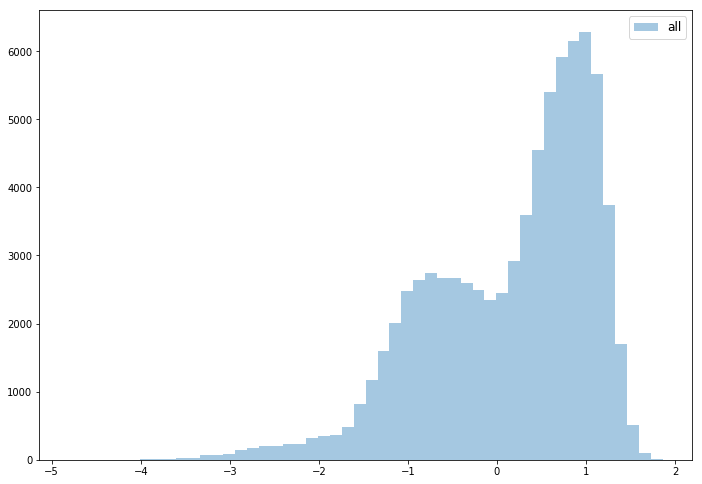

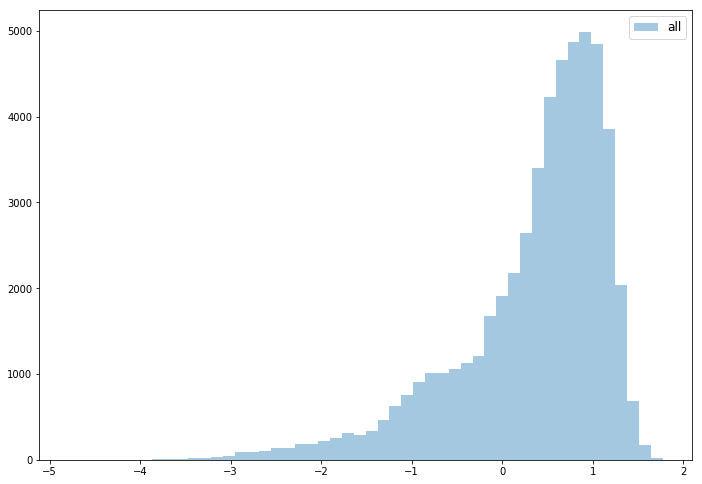

In [14]:
simple_window_cut_hists([d[1] for d in raw_top_data],-.9,.7,6)

In [47]:
def learn(val,thresh,eig):
    out_labels = simple_window_labels([d[1] for d in raw_top_data],val,thresh,eig)
    nt, nf = out_labels.count(0), out_labels.count(1)
    monkey = max([100.0*nt/(nt+nf), 100.0*nf/(nt+nf)])
    print "MONKEY WOULD GET", monkey
    
    import csv

    rows = [input_data[i] + [out_labels[i]] for i in range(len(input_data))]

    with open('data.csv', 'w') as writeFile:
        writer = csv.writer(writeFile)
        writer.writerows(rows)
        writeFile.close()

    import sys
    import datetime
    #print('Python: {}'.format(sys.version))
    # scipy
    import scipy
    #print('scipy: {}'.format(scipy.__version__))
    # numpy
    import numpy
    #print('numpy: {}'.format(numpy.__version__))
    # matplotlib
    import matplotlib
    #print('matplotlib: {}'.format(matplotlib.__version__))
    # pandas
    import pandas
    #print('pandas: {}'.format(pandas.__version__))
    # scikit-learn
    import sklearn
    from sklearn.decomposition import PCA
    #print('sklearn: {}'.format(sklearn.__version__))

    # Load libraries
    import pandas
    from pandas.plotting import scatter_matrix
    import matplotlib.pyplot as plt
    from sklearn import model_selection
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.linear_model import LinearRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC

    def now():
        return str(datetime.datetime.now())

    from matplotlib import rc


    # font = {'family': 'normal','size': 18}
    # plt.rc('font', **font)
    # rc('mathtext', default='regular')
    # plt.rc('text', usetex=True)
    # plt.rc('font', family='serif')


    # Load dataset

    url = 'data.csv'

    # names = []
    # for i in range(1):
    #         names.append('v'+str(i))
    #         names.append('m'+str(i))
    # names.append('class')
    # print(names)
    # print(len(names))
    #print('begin loading csv', now())
    dataset = pandas.read_csv(url)#, names=names)
    #print('end loading csv', now())

    # shape
    #print(dataset.shape)

    # head
    #print(dataset.head(20))


    # descriptions
    #print(dataset.describe())

    # # box and whisker plots
    # dataset.plot(kind='box', subplots=True, layout=(157,157), sharex=False, sharey=False)
    # plt.show()

    # # histograms
    # dataset.hist()
    # plt.show()

    # # scatter plot matrix
    # scatter_matrix(dataset)
    # plt.show()

    # # # Split-out validation dataset
    array = dataset.values
    #print array
    #print array.shape
    X = array[:,0:20]
    Y = array[:,20]
    #print 'should be 1s and 0s', Y
    validation_size = 0.1
    seed=349534
    X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

    # # Test options and evaluation metric
    seed = 11
    scoring = 'neg_mean_squared_error'

    # Spot Check Algorithms
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('SVM', SVC()))

    #evaluate each model in turn
    results = []
    names = []
    for name, model in models:
       #print(name, str(datetime.datetime.now()))
       kfold = model_selection.KFold(n_splits=10, random_state=seed)
       cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
       results.append(cv_results)
       #print('len', cv_results)
       names.append(name)
       msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
       print(msg)

    #Compare Algorithms
    fig = plt.figure()
    #fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

    # import csv

    # names = []
    # for i in range(1):
    #         names.append('v'+str(i))
    #         names.append('m'+str(i))
    # names.append('class')
    # testdata = pandas.read_csv('datanew/testdatave6.bigcsv', names=names)
    # array = testdata.values
    # Xtest = array[:,0:2]
    # Ytest = array[:,2]
    # print(testdata.groupby('class').size())

    # preds = []        
    # for name, model in models:
    #         print('test',name)
    #         model.fit(X_train,Y_train)
    #         print(model.score(X_validation,Y_validation))
    #         print(model.score(Xtest,Ytest))


    # # fig = plt.figure()
    # # fig.suptitle('Algorithm Comparison')
    # # ax = fig.add_subplot(111)
    # # plt.boxplot(results)
    # # ax.set_xticklabels(names)
    # # plt.show()

    # # # Make predictions on validation dataset
    lor = LogisticRegression()
    print('begin logistic regression fit')
    lor.fit(X_train, Y_train)
    print('end logistic regression fit')
    predictions = lor.predict(X_validation)
    print 'predictions', predictions
    print(accuracy_score(Y_validation, predictions))
    print(confusion_matrix(Y_validation, predictions))
    print(classification_report(Y_validation, predictions))

    # # check: 32 (a,S) pairs
    # aSs = []
    # for x in X:
    #         t = [x[0],x[1]]
    #         if t not in aSs: aSs.append(t)

    # # check: all (a,S) pairs have same Y results
    # checks = [[] for i in aSs]
    # for i in range(len(X)):
    #         x = X[i]
    #         if Y[i] not in checks[aSs.index(t)]: checks[aSs.index(t)].append(Y[i])

    # # check aS predictions match table and hyperplane distances
    # preds = [lor.predict(numpy.array(aS))[0] for aS in aSs] 
    # dists = [lor.decision_function(numpy.array(aS)) for aS in aSs]        
    # for a in range(4,6):
    #         for S in range(40):
    #                 if [a,S] in aSs:
    #                         print [a,S], checks[aSs.index([a,S])], preds[aSs.index([a,S])], dists[aSs.index([a,S])]



    # # count 
    # # predsx = [lor.predict(x)[0] for x in Xtest] 
    # c5y, c5n, c4y, c4n = 0,0,0,0
    # for i in range(len(predsx)):
    #         if Xtest[i][0] == 5 and Ytest[i] == 'has_E6': c5y += 1
    #         if Xtest[i][0] == 5 and Ytest[i] == 'no_E6': c5n += 1
    #         if Xtest[i][0] == 4 and Ytest[i] == 'has_E6': c4y += 1
    #         if Xtest[i][0] == 4 and Ytest[i] == 'no_E6': c4n += 1

    # print 'preds and actuals counts',c5y,c5n,c4y,c4n # out is 0 19753 14 233


MONKEY WOULD GET 51.1188811189
LR: -0.365544 (0.023185)
LDA: -0.365803 (0.026567)
KNN: -0.411399 (0.022786)
CART: -0.371762 (0.021402)
SVM: -0.367617 (0.023643)


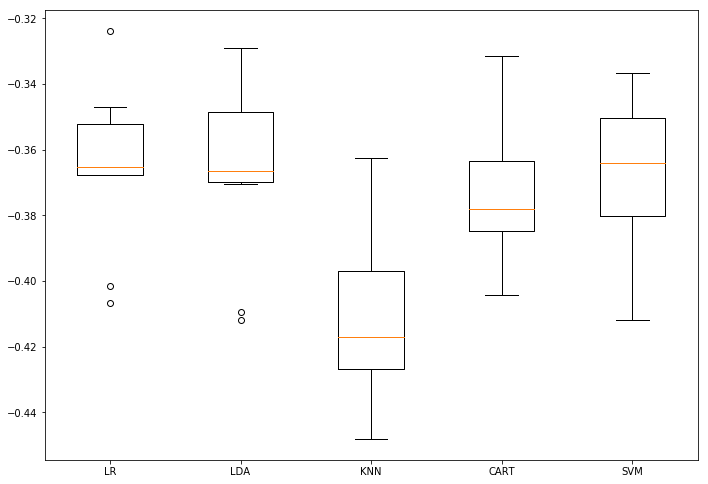

begin logistic regression fit
end logistic regression fit
predictions [0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0
 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1
 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1
 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1
 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0
 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0
 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0
 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1]
0.6596736596736597
[[165  54]
 [ 92 118]]
              pre

In [50]:
learn(-1,.7,6)

In [42]:
sklearn.metrics.SCORERS.keys()

['precision_samples',
 'f1_weighted',
 'balanced_accuracy',
 'f1_samples',
 'f1',
 'adjusted_mutual_info_score',
 'precision',
 'normalized_mutual_info_score',
 'neg_mean_squared_error',
 'precision_micro',
 'neg_mean_squared_log_error',
 'recall_samples',
 'homogeneity_score',
 'precision_weighted',
 'fowlkes_mallows_score',
 'average_precision',
 'roc_auc',
 'adjusted_rand_score',
 'recall_macro',
 'v_measure_score',
 'completeness_score',
 'r2',
 'recall_weighted',
 'recall',
 'precision_macro',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'mutual_info_score',
 'f1_macro',
 'f1_micro',
 'brier_score_loss',
 'recall_micro',
 'neg_median_absolute_error',
 'explained_variance',
 'accuracy']

In [73]:
idx = 904

input_data[idx] + [out_labels[idx]]

[17, 15, 2, 15, 0, 0, 0, 0, 0, 0, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]